# Predicting Solar PV and Energy Output for UC Berkeley Buildings Using Weather Variables

Group composition: 
* Hughes, Michael — contributed to writing the project background and project objectives, cleaning the Solar PV and Energy Usage datasets, performing EDA with detailed analysis for each visualization, and developing the Lasso regression models. He also helped with the calculations for converting energy usage to kWh. (~28 hours)

* Nguyen, Kathryn — obtained solar PV data from the UC Berkeley Energy Office and cleaned and merged the weather data. Wrote the abstract, data description, and interpretation and conclusions sections + provided descriptions of the models. Created visualizations for linear and lasso regression and random forest feature importance. Also deceloped the linear regression and KNN models. (~28 hours)

* Tseng, Enoch — handled a majority of the modeling tasks, including implementing the Random Forest models and time series forecasting. He performed cross-validation and parameter tuning for the predictive models and assisted with model evaluation and comparison. He also helped with the data cleaning and a large portion of the final notebook organization. (~30 hours)

## Abstract
The expansion of solar energy systems on UC Berkeley's campus reflects a global push to reduce reliance on fossil fuels. As the campus transitions from generating its own power to purchasing electricity from PG&E, optimizing energy usage and solar power generation becomes increasingly important to mitigate cost fluctuations and improve sustainability. Our project aims to develop predictive models for next day solar photovoltaic (PV) generation and energy usage in campus buildings, enabling better battery charging schedules and resource allocation strategies.

Using weather data from the Berkeley Lawrence National Laboratory, including variables such as solar radiation, temperature, and wind speed, alongside time-based features like hour and day of the week, we applied and compared multiple machine learning models. Techniques included linear regression, lasso regression, polynomial lasso regression, k-nearest neighbors, random forest, and time series forecasting. Random forest models demonstrated the best performance, achieving $R^2$ values of 0.9840 for solar generation and 0.9894 for energy usage, while time series models minimized RMSE for multi-hour predictions.

Our findings highlight the potential of predictive modeling to support UC Berkeley's energy management goals. Accurate forecasts can inform optimal battery charging during off-peak hours and reduce dependence on expensive grid electricity during peak demand. This strategy promises significant cost savings and reinforces the university's commitment to sustainability. Future work could expand these methods to integrate additional renewable energy sources and refine long-term forecasting capabilities.

## Project Background

High levels of greenhouse gas emissions in recent decades has led to dramatic increases in anthropogenic climate change and its effects. This warming has caused large scale impacts on human health, environmental damages, and economic output. One way that a reduction in emissions can be met is switching from fossil fuels to renewable energy sources.  CO2 emissions from the energy sector make up roughly 34% of global emissions (Intergovernmental Panel on Climate Change 2022). Attacking this sector can dramatically reduce emissions especially in combination with the ongoing transition away from gas vehicles (which make up another 15% of emissions) towards electric vehicles (Intergovernmental Panel on Climate Change 2022). Recent breakthroughs have pushed down the price of photovoltaics, wind energy, and concentrated solar power to the point of being competitive or even cheaper than fossil fuels in some cases. Renewable energy however, does have high upfront costs that slows down implementation (International Renewable Energy Agency 2022).

For their part UC Berkeley has been trying to shift away from fossil fuel generation in order to minimize its greenhouse gas emissions in recent years. It started by building 1.2 MW of solar generation across 5 buildings (Chou Hall, Jacobs Hall, Eshleman Hall, Recreational Sports Facility, and Martin Luther King Jr. Student Union) with plans of expanding to 12 MW of generation by 2030. The [Berkeley Clean Energy Campus](https://cleanenergycampus.berkeley.edu/sites/default/files/final-cec-phase-1-11.27.23_2.pdf) initiative aims to shut down the co-gen plant on campus, which produces over 90% of the universities' energy, and instead purchase a large portion of its energy from PGE. The current co-gen plant produces at a rate of roughly 24 MW and runs 24/7 at an efficiency of 76% it is also responsible for roughly 70% of the carbon emissions from the campus. The initiative plans to cut campus emissions by 85% by 2030 to get below the California Cap and Trade threshold.

In light of this the university must take into account electricity pricing and demand when designing its electricity infrastructure and plan. Electricity prices can fluctuate from 0.07 dollars up to 0.20 dollars depending on the time of year and whether demand is peaking or not. For the buildings with solar implementation the installation of batteries can help manage these price fluctuations and store excess solar energy. Solar energy can be used during the day when electricity prices are low to charge batteries which are then discharged when peak demand roles around. In predicting the energy usage and energy production of buildings we can optimize the charging of batteries to reduce costs for the university and ensure that no energy is wasted.


## Project Objective

The purpose of this project is to:
1) Train and evaluate different models to predict 1 hour electricity generation of on campus photovoltaics 1 day in the future using historical solar and weather data. 
2) Train and evaluate different models to predict 1 hour electricity usage of on campus buildings 1 day in the future using historical usage and weather data.

It is important to answer these questions because the difference in pricing can lead to the university saving or spending hundreds of thousands of dollars more or less depending on when they use utility electricity and when they use electricity generated from solar photovoltaics.

This project is similar to others as many utility companies have their own algorithms for predicting solar generation and energy usage. However we will be looking at specific buildings on campus which may follow a very different usage pattern than most buildings due to class times and hours available. The University most likely has their own forecasting methods but none of these are publicly available so we wanted to test our prediction methods.

## Input Data Description

### Data Origins

We used the following three datasets for our analysis: Solar PV building generation, Energy Usage (5 separate datasets for each building), and weather data from the Lawrence Berkeley National Laboratory (LBNL) (4 datasets for each year from 2020 to 2024). All of our datasets are made available in this Google Drive Folder.

1. Solar PV Generation: This dataset includes hourly solar photovoltaic (PV) generation data for five UC Berkeley buildings (Chou, Eshleman, MLK, Jacobs, and RSF) that have solar panels. The data was sourced directly from Bruce Chamberlain of the UC Berkeley Energy Office after an initial exploration of trends and variables on the publicly available UC Berkeley Energy Dashboard.

2. Energy Usage: This consists of five separate datasets representing the hourly energy usage for the same five campus buildings. The data was collected through advanced energy monitoring systems installed across UC Berkeley’s campus, which record energy flows in real time and aggregate the results for detailed analysis.

3. Weather Data: Weather data was provided by the Lawrence Berkeley National Laboratory (LBNL) and consists of hourly records from an array of meteorological sensors for the years 2020 through 2024. These high-resolution datasets include weather metrics such as temperature, humidity, and solar radiation, which helps us understand variations in solar energy production and building energy demands.

### Structure, Granularity, Scope, Temporality, and Faithfulness (SGSTF) of Data

Each of the datasets are structured as time-series data. Each row represents an hourly observation, so the granularity is able to capture both daily and seasonal trends. The scope of the Solar PV and Energy Usage datasets spans two years (July 2020 to July 2022), while the weather data extends across four years (2020 to 2024). The data is sequentially ordered, which allowed us to do time-series forecasting. The datasets were collected using advanced energy monitoring systems and high-resolution meteorological sensors, which suggests that the data is faithful in capturing accurate and reliable measurements. 

### Target Variables and Features

The target variables for analysis are 1) Solar PV Generation (kWh) for solar energy modeling and 2) Energy Usage (kWh) for consumption analysis. Features include temporal variables such as hour of the day, day of the week, and season, as well as weather attributes like temperature, humidity, and solar radiation. Lagged energy and solar generation data were also incorporated as features to model dependencies over time.

In [1]:
!pip install openpyxl
import pandas as pd
import numpy as np
import sklearn
import datetime as dt
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 28.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Dataset 1: UCB Solar PV Building Generation (2022-24)

In [74]:
# Parsing in the solar PV genreation dataset from the UC Berkeley Energy Office for 2022-24
ucb_solar = pd.ExcelFile('ucb_solar_2022_24.xlsx')
ucb_solar_df = ucb_solar.parse(ucb_solar.sheet_names[0])

# Displaying the solar PV generation dateframe
ucb_solar_df.head()

,Timestamp,Chou Hall Solar PV Generation Meter Demand,Chou Hall Solar PV Generation Meter Usage,Eshleman Hall Solar PV Generation Meter Demand,Eshleman Hall Solar PV Generation Meter Usage,Jacobs Hall Solar PV Generation Meter Demand,Jacobs Hall Solar PV Generation Meter Usage,Martin Luther King Jr. Student Union Solar PV Generation Meter Demand,Martin Luther King Jr. Student Union Solar PV Generation Meter Usage,Recreational Sports Facility Solar PV Generation Meter Demand,Recreational Sports Facility Solar PV Generation Meter Usage
0,2022-11-01 00:00:00,0.01,0.00000,-0.111,-0.109375,-0.06,0.004464,-0.049,-0.0625,NaN,NaN
1,2022-11-01 01:00:00,0.01,0.03125,-0.110,-0.109375,-0.06,0.004464,-0.049,-0.0625,NaN,NaN
2,2022-11-01 02:00:00,0.01,0.00000,-0.110,-0.117188,-0.06,0.004464,-0.050,-0.0625,NaN,NaN
3,2022-11-01 03:00:00,0.01,0.00000,-0.110,-0.109375,-0.06,0.004464,-0.050,-0.0625,NaN,NaN
4,2022-11-01 04:00:00,0.01,0.03125,-0.110,-0.109375,-0.06,0.004464,-0.050,0.0000,NaN,NaN


### Dataset 2: UCB Building Energy Usage (5 datasets; 1 per building)

In [5]:
# Reading in the electricity usage dataset for Chou Hall for 2020-22
chou_electric = pd.read_csv('chou_elec.csv')

# Reading in the electricity usage dataset for Eshleman Hall for 2020-22
eshleman_electric = pd.read_csv('eshleman_elec.csv')

# Reading in the electricity usage dataset for the MLK Student Union for 2020-22
mlk_electric = pd.read_csv('mlk_elec.csv')

# Reading in the electricity usage dataset for Jacobs Hall for 2020-22
jacobs_electric = pd.read_csv('jacobs_elec.csv')

# Reading in the electricity usage dataset for the RSF for 2020-22
rsf_electric = pd.read_csv('rsf_elec.csv')

# Displaying the head for the electricity usage dataframe for Chou Hall
chou_electric.head()

,time (US/Pacific),error,lowrange,highrange,Active Energy Import Tariff 1 (kWh),Active Energy Import Tariff 2 (kWh),Active Energy Export Tariff 1 (kWh),Active Energy Export Tariff 2 (kWh),Reactive Energy Import Tariff 1 (kVARh),Reactive Energy Import Tariff 2 (kVARh),...,Frequency (Hz),Average Voltage L-N (Volts),Average Voltage L-L (Volts),Average Current (Amps),Total Apparent Power (VA),Total Active Power (W),Total Reactive Power (VAR),Total Power Factor,Amplitude Unbalance - Voltage (%),Amplitude Unbalance - Current (%)
0,7/27/20 8:00,0,0.0,0.0,2432207.893,0.0,0.0,0.0,406867.200,0.0,...,59.95,288.36,499.45,91.17,78871.53,76667.45,9007.00,0.97,0.08,8.01
1,7/27/20 8:15,0,0.0,0.0,2432225.275,0.0,0.0,0.0,406868.608,0.0,...,60.00,288.61,499.88,78.39,67881.56,66562.42,4148.37,0.98,0.11,6.09
2,7/27/20 8:30,0,0.0,0.0,2432241.053,0.0,0.0,0.0,406869.633,0.0,...,59.98,288.54,499.76,78.32,67800.63,66648.87,4904.64,0.98,0.09,7.04
3,7/27/20 8:45,0,0.0,0.0,2432256.837,0.0,0.0,0.0,406870.720,0.0,...,59.97,288.50,499.69,88.22,76353.16,73995.83,10125.73,0.97,0.09,6.82
4,7/27/20 9:00,0,0.0,0.0,2432274.261,0.0,0.0,0.0,406872.797,0.0,...,59.96,288.61,499.89,81.01,70142.28,67894.56,6833.98,0.97,0.11,8.80


### Dataset 3: LBNL Weather Data (4 datasets for each year from 2020 to to 2024)

In [6]:
# Reading in the LBNL weather data for 2020-21
weather_df_20_21 = pd.read_csv('lbnl2020_21.csv')
weather_df_20_21.drop('Station_ID', axis=1, inplace=True) # Removing unneccessary Staton_ID column

# Reading in the LBNL weather data for 2021-22
weather_df_21_22 = pd.read_csv('LBNL2021_2022.csv')
weather_df_21_22.drop('Station_ID', axis=1, inplace=True) # Removing unneccessary Staton_ID column

# Reading in the LBNL weather data for 2022-23
weather_df_22_23 = pd.read_csv('lbnl1_cleaned_2022_2023.csv')
# Staton_ID column was already removed from the dataset when downloaded

# Reading in the LBNL weather data for 2023-24
weather_df_23_24 = pd.read_csv('LBNL_2023_2024_cleaned.csv')
weather_df_23_24.drop('Station_ID', axis=1, inplace=True) # Removing unneccessary Staton_ID column

weather_df_20_21.head()

,Date_Time,pressure_set_1,air_temp_set_1,air_temp_set_2,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d,dew_point_temperature_set_1d,altimeter_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d
0,07/27/2020 22:00 PDT,28.99,56.38,55.45,85.6,4.21,150.8,5.95,0.14,0.0,13.11,NaN,SSE,NaN,52.08,NaN,29.94,56.38
1,07/27/2020 22:15 PDT,28.99,56.51,55.42,85.1,3.23,162.4,5.57,0.16,0.0,13.12,NaN,SSE,NaN,52.04,NaN,29.94,56.51
2,07/27/2020 22:30 PDT,28.99,56.27,54.94,85.1,3.97,150.0,6.34,0.14,0.0,13.12,NaN,SSE,NaN,51.81,NaN,29.94,56.27
3,07/27/2020 22:45 PDT,28.99,55.94,54.71,85.3,3.61,151.6,6.26,0.18,0.0,13.12,NaN,SSE,NaN,51.55,NaN,29.94,55.94
4,07/27/2020 23:00 PDT,29.00,55.78,54.53,85.3,2.40,188.3,4.88,0.19,0.0,13.12,NaN,S,NaN,51.39,NaN,29.95,55.78


## Data Cleaning

In this section, we describe the steps taken to clean and merge the weather data obtained from the Lawrence Berkeley National Laboratory (LBNL) for 2022-2024.


### LBNL Weather Data Cleaning

In the first step, we combined multiple weather datasets across two time periods (2022-2023 and 2023-2024) using the `pd.concat` function to consolidate that data into a single DataFrame for each period. The Date.Time column was converted into a datetime object. We used `.floor('H')` to standardize timestamps at the hourly level, aligning the weather data with our target variables (solar PV generation and energy usage).

In [7]:
from dateutil import parser

# Concatenating the weather dataframes for 2022-23 and 2023-24 into one
weather_df_20_22 = pd.concat([weather_df_20_21, weather_df_21_22])

# Parsing the hour from the Date_Time column
weather_df_20_22['Date_Time'] = weather_df_20_22['Date_Time'].astype(str)
weather_df_20_22['Date_Time'] = weather_df_20_22['Date_Time'].apply(lambda x: parser.parse(x))
weather_df_20_22['Hour'] = weather_df_20_22['Date_Time'].dt.floor('H')

# Aggregating the weather data by hour
numeric_columns = weather_df_20_22.select_dtypes(include='number').columns
weather_df_20_22 = weather_df_20_22.groupby('Hour')[numeric_columns].mean()

/root/venv/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/root/venv/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Columns filled with NaN values, such as `wind_chill_set_1d`, `heat_index_set_1d`, and `altimeter_set_1d`, were removed.

In [8]:
# These columns are filled with NaN values, don't need to include
weather_df_20_22.drop(['wind_chill_set_1d', 'heat_index_set_1d', 'altimeter_set_1d'], axis = 1, inplace=True)
weather_df_20_22.head()

,pressure_set_1,air_temp_set_1,air_temp_set_2,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d
Hour,,,,,,,,,,,,,
2020-07-27 22:00:00,28.9900,56.2750,55.1300,85.275,3.7550,153.700,6.0300,0.1550,0.0,13.1175,51.8700,29.9400,56.2750
2020-07-27 23:00:00,28.9950,55.4925,54.0525,85.675,2.8025,219.550,6.1425,0.1875,0.0,13.1275,51.2300,29.9450,55.4925
2020-07-28 00:00:00,28.9900,54.5125,53.0750,87.425,3.6250,262.275,6.7150,0.2000,0.0,13.1400,50.8150,29.9500,54.5125
2020-07-28 01:00:00,28.9850,54.0100,52.7075,88.125,3.8075,228.400,7.7850,0.2000,0.0,13.1500,50.5375,29.9350,54.0100
2020-07-28 02:00:00,28.9725,53.9100,52.5425,88.175,2.7050,225.125,6.0125,0.2000,0.0,13.1550,50.4525,29.9275,53.9100


Finally, the cleaned data for two periods (2022-2023 and 2023-2024) was combined into a single dataframe.

In [9]:
# Concatenating the weather dataframes for 2022-23 and 2023-24 into one
weather_df_22_24 = pd.concat([weather_df_22_23, weather_df_23_24])

# Parsing the hour from the Date_Time column
weather_df_22_24['Date_Time'] = weather_df_22_24['Date_Time'].astype(str)
weather_df_22_24['Date_Time'] = weather_df_22_24['Date_Time'].apply(lambda x: parser.parse(x))
weather_df_22_24['Hour'] = weather_df_22_24['Date_Time'].dt.floor('H')

# Aggregating the weather data by hour
numeric_columns = weather_df_22_24.select_dtypes(include='number').columns
weather_df_22_24 = weather_df_22_24.groupby('Hour')[numeric_columns].mean()

/root/venv/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/root/venv/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


We removed the same columns filled with Nan values for the 2022-24 time period.

In [10]:
# These columns are filled with NaN values, don't need to include
weather_df_22_24.drop(['wind_chill_set_1d', 'heat_index_set_1d', 'altimeter_set_1d'], axis = 1, inplace=True)
weather_df_22_24.head()

,pressure_set_1,air_temp_set_1,air_temp_set_2,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d
Hour,,,,,,,,,,,,,
2022-10-31 15:00:00,28.925000,58.2600,57.8375,75.385000,2.9575,277.350000,5.610000,392.200000,0.0,13.025000,50.430000,29.865000,58.260000
2022-10-31 16:00:00,28.913333,58.9725,58.5675,73.146667,3.1700,272.533333,7.176667,374.433333,0.0,13.010000,50.200000,29.856667,58.863333
2022-10-31 17:00:00,28.910000,55.5650,55.4075,78.516667,4.3000,276.666667,7.480000,103.123333,0.0,13.006667,49.493333,29.850000,56.196667
2022-10-31 18:00:00,28.902500,53.2100,53.1675,85.232500,2.7200,219.187500,5.112500,12.115000,0.0,13.055000,48.842500,29.852500,53.210000
2022-10-31 19:00:00,28.905000,51.4850,51.3800,90.240000,2.5300,263.000000,5.840000,0.000000,0.0,13.095000,48.690000,29.857500,51.485000


### UCB Solar PV Generation Data Cleaning

To focus solely on solar PV generation measurements, irrelevant columns like "Meter Demand" were removed from the dataset using the `drop()` method.

In [76]:
# We are primarily focused on the solar PV generation measurements, which corresponds to "Meter Usage" for this dataset
# Thus, we can filter out all other columns (i.e. we can filter out "Meter Demand" columns)
ucb_solar_df = ucb_solar_df.drop(columns=['Chou Hall Solar PV Generation Meter Demand', 'Eshleman Hall Solar PV Generation Meter Demand', 'Jacobs Hall Solar PV Generation Meter Demand', 'Martin Luther King Jr. Student Union Solar PV Generation Meter Demand', 'Recreational Sports Facility Solar PV Generation Meter Demand'])

All missing values (NaNs) were replaced with 0 using the `fillna()` function. We did this because missing values during non-generation hours would otherwise cause inaccuracies in the analysis and models.

In [16]:
# Filling missing values with 0
ucb_solar_df = ucb_solar_df.fillna(0)

# All values < 0.1 will be set to 0. 
# Threshold was determined to account for inconsistent readings during non-generation hours
threshold = 0.1
ucb_solar_df.loc[:, ucb_solar_df.columns != 'Timestamp'] = ucb_solar_df.loc[:, ucb_solar_df.columns != 'Timestamp'].where(ucb_solar_df.loc[:, ucb_solar_df.columns != 'Timestamp'] >= threshold, 0)
ucb_solar_df.head()

,Timestamp,Chou Hall Solar PV Generation Meter Usage,Eshleman Hall Solar PV Generation Meter Usage,Jacobs Hall Solar PV Generation Meter Usage,Martin Luther King Jr. Student Union Solar PV Generation Meter Usage,Recreational Sports Facility Solar PV Generation Meter Usage
0,2022-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0
1,2022-11-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2,2022-11-01 02:00:00,0.0,0.0,0.0,0.0,0.0
3,2022-11-01 03:00:00,0.0,0.0,0.0,0.0,0.0
4,2022-11-01 04:00:00,0.0,0.0,0.0,0.0,0.0


### UCB Energy Usage Data Cleaning

For Chou, the measurement of energy usage (in kWh) can be derived from the following formula: 

$\text{Energy Usage (kWh)} = \frac{\text{Total Apparent Power (VA)} \times \text{Total Power Factor}}{1000}$

In [18]:
chou_electric['Chou Energy Usage (kWh)'] = (chou_electric['Total Apparent Power (VA)']*chou_electric['Total Power Factor'])/1000
chou_electric_filtered = chou_electric.loc[:, ['time (US/Pacific)','Chou Energy Usage (kWh)']]

The timestamp column (time (US/Pacific)) is converted into a datetime object. The time is then rounded to the nearest hour using `.floor('H')`.

In [20]:
# Parsing the hour from the time column for Chou
chou_electric_filtered['time (US/Pacific)'] = chou_electric_filtered['time (US/Pacific)'].astype(str)
chou_electric_filtered['time (US/Pacific)'] = chou_electric_filtered['time (US/Pacific)'].apply(lambda x: parser.parse(x))
chou_electric_filtered['Hour'] = chou_electric_filtered['time (US/Pacific)'].dt.floor('H')

# Aggregating the weather data by hour for Chou
numeric_columns = chou_electric_filtered.select_dtypes(include='number').columns
chou_hour = chou_electric_filtered.groupby('Hour')[numeric_columns].sum().reset_index()

For Eshleman, MLK, and Jacobs, the measurement of energy usage (in kWh) corresponds on of the "Total" columns.

In [22]:
eshleman_electric = pd.read_csv('eshleman_elec.csv')
eshleman_electric['Eshleman Energy Usage (kWh)'] = eshleman_electric[' Total.3']
eshleman_electric_filtered = eshleman_electric.loc[:, ['time (US/Pacific)','Eshleman Energy Usage (kWh)']]

mlk_electric = pd.read_csv('mlk_elec.csv')
mlk_electric['MLK Energy Usage (kWh)'] = mlk_electric[' Total.3']
mlk_electric_filtered = mlk_electric.loc[:, ['time (US/Pacific)','MLK Energy Usage (kWh)']]

jacobs_electric = pd.read_csv('jacobs_elec.csv')
jacobs_electric['Jacobs Energy Usage (kWh)'] = jacobs_electric[' Total.3']
jacobs_electric_filtered = jacobs_electric.loc[:, ['time (US/Pacific)','Jacobs Energy Usage (kWh)']]

Next, we parsed and rounded timestamps to standardize the time format and aggregate hourly, aligning with the resolution of the weather dataset. After the timestamps are parsed, energy usage is grouped and aggregated by the 'Hour' column.

In [23]:
# Parsing the hour from the time column for Eshleman
eshleman_electric_filtered['time (US/Pacific)'] = eshleman_electric_filtered['time (US/Pacific)'].astype(str)
eshleman_electric_filtered['time (US/Pacific)'] = eshleman_electric_filtered['time (US/Pacific)'].apply(lambda x: parser.parse(x))
eshleman_electric_filtered['Hour'] = eshleman_electric_filtered['time (US/Pacific)'].dt.floor('H')

# Parsing the hour from the time column for MLK
mlk_electric_filtered['time (US/Pacific)'] = mlk_electric_filtered['time (US/Pacific)'].astype(str)
mlk_electric_filtered['time (US/Pacific)'] = mlk_electric_filtered['time (US/Pacific)'].apply(lambda x: parser.parse(x))
mlk_electric_filtered['Hour'] = mlk_electric_filtered['time (US/Pacific)'].dt.floor('H')

# Parsing the hour from the time column for Jacobs
jacobs_electric_filtered['time (US/Pacific)'] = jacobs_electric_filtered['time (US/Pacific)'].astype(str)
jacobs_electric_filtered['time (US/Pacific)'] = jacobs_electric_filtered['time (US/Pacific)'].apply(lambda x: parser.parse(x))
jacobs_electric_filtered['Hour'] = jacobs_electric_filtered['time (US/Pacific)'].dt.floor('H')

# Aggregating the weather data by hour for Eshleman
numeric_columns = eshleman_electric_filtered.select_dtypes(include='number').columns
eshleman_hour = eshleman_electric_filtered.groupby('Hour')[numeric_columns].sum().reset_index()

# Aggregating the weather data by hour for MLK
numeric_columns = mlk_electric_filtered.select_dtypes(include='number').columns
mlk_hour = mlk_electric_filtered.groupby('Hour')[numeric_columns].sum().reset_index()

# Aggregating the weather data by hour for Jacobs
numeric_columns = jacobs_electric_filtered.select_dtypes(include='number').columns
jacobs_hour = jacobs_electric_filtered.groupby('Hour')[numeric_columns].sum().reset_index()

For RSF, the measurement of energy usage (in kWh) can be derived by converting from kW to kWh for 15 min intervals
. We take the absolute value to account for input errors (corresponding kVAR columns are always positive, which is why we know these values should be positive)

In [25]:
rsf_electric['RSF Energy Usage (kWh)'] = abs(rsf_electric['kW total (kW)'] / 4)
rsf_electric_filtered = rsf_electric.loc[:, ['time (US/Pacific)','RSF Energy Usage (kWh)']]

In [28]:
# Parsing the hour from the time column for RSF
rsf_electric_filtered['time (US/Pacific)'] = rsf_electric_filtered['time (US/Pacific)'].astype(str)
rsf_electric_filtered['time (US/Pacific)'] = rsf_electric_filtered['time (US/Pacific)'].apply(lambda x: parser.parse(x))
rsf_electric_filtered['Hour'] = rsf_electric_filtered['time (US/Pacific)'].dt.floor('H')

# Aggregating the weather data by hour for RSF
numeric_columns = rsf_electric_filtered.select_dtypes(include='number').columns
rsf_hour = rsf_electric_filtered.groupby('Hour')[numeric_columns].sum().reset_index()

Finally, we merged energy usage data from the campus buildings into a single DataFrame using `pd.merge` and iteratively merging the remaining DataFrames using a for loop.

In [29]:
# Merging all energy usage dataframes into a single dataframe
combined_usage_df = pd.merge(chou_hour, eshleman_hour, left_on='Hour', right_on='Hour', how='inner')
remaining_usage_dfs = [mlk_hour, jacobs_hour, rsf_hour]
for usage_df in remaining_usage_dfs:
    combined_usage_df = pd.merge(combined_usage_df, usage_df, left_on='Hour', right_on='Hour', how='inner')
combined_usage_df.head()

,Hour,Chou Energy Usage (kWh),Eshleman Energy Usage (kWh),MLK Energy Usage (kWh),Jacobs Energy Usage (kWh),RSF Energy Usage (kWh)
0,2020-07-29 13:00:00,124.806386,234.399,432.441,0.0,73.75
1,2020-07-29 14:00:00,168.578181,240.402,446.609,0.0,65.75
2,2020-07-29 15:00:00,161.571882,232.183,464.657,0.0,52.50
3,2020-07-29 16:00:00,234.894844,240.714,495.088,0.0,29.25
4,2020-07-29 17:00:00,280.377720,255.895,541.700,0.0,7.25


### Merging UCB Solar PV Generation Data and LBNL Weather Data

Below, we merge the solar PV generation data with the weather data for 2022-24, as the solar data only spans from 2022-24. Because the aim of our prediction problem is to predict solar PV generation for the next day, we merge the DataFrames on 'Timestamp_Minus_24h', which allows the weather data to correspond to solar PV generation data for the next day.

In [30]:
# Adding a 'Timestamp_Minus_24h' column to the ucb_solar_df dataframe, which corresponds to the current timestamp minus 24 hours (aka the previous day)
ucb_solar_df['Timestamp_Minus_24h'] = ucb_solar_df['Timestamp'] - pd.Timedelta(hours=24)

combined_solar_weather_df = pd.merge(ucb_solar_df, weather_df_22_24, left_on='Timestamp_Minus_24h', right_index=True, how='inner')

Next, we rename the columns and forward-fill the missing values in the weather DataFrame to account for time inconsistencies.

In [31]:
# Renaming the columns of the combined_solar_weather_df dataframe for clarity
combined_solar_weather_df.rename(columns={"Timestamp": "Future Timestamp", "Chou Hall Solar PV Generation Meter Usage": "Chou Future PV Generation", "Eshleman Hall Solar PV Generation Meter Usage": "Eshleman Future PV Generation", "Jacobs Hall Solar PV Generation Meter Usage": "Jacobs Future PV Generation", "Martin Luther King Jr. Student Union Solar PV Generation Meter Usage": "MLK Future PV Generation", "Recreational Sports Facility Solar PV Generation Meter Usage": "RSF Future PV Generation", "Timestamp_Minus_24h": "Current Timestamp"}, inplace=True)

# Forward-filling the missing values in the combined_solar_weather_df dataframe, to account for time inconsistencies when merging
combined_solar_weather_df = combined_solar_weather_df.ffill()
combined_solar_weather_df.head()

,Future Timestamp,Chou Future PV Generation,Eshleman Future PV Generation,Jacobs Future PV Generation,MLK Future PV Generation,RSF Future PV Generation,Current Timestamp,pressure_set_1,air_temp_set_1,air_temp_set_2,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d
15,2022-11-01 15:00:00,26.68750,3.562500,32.375000,25.2500,102.375,2022-10-31 15:00:00,28.925000,58.2600,57.8375,75.385000,2.9575,277.350000,5.610000,392.200000,0.0,13.025000,50.430000,29.865000,58.260000
16,2022-11-01 16:00:00,13.09375,2.039062,20.625000,14.5000,63.500,2022-10-31 16:00:00,28.913333,58.9725,58.5675,73.146667,3.1700,272.533333,7.176667,374.433333,0.0,13.010000,50.200000,29.856667,58.863333
17,2022-11-01 17:00:00,2.59375,0.343750,4.312500,3.6875,22.125,2022-10-31 17:00:00,28.910000,55.5650,55.4075,78.516667,4.3000,276.666667,7.480000,103.123333,0.0,13.006667,49.493333,29.850000,56.196667
18,2022-11-01 18:00:00,0.15625,0.000000,0.293103,0.0000,0.875,2022-10-31 18:00:00,28.902500,53.2100,53.1675,85.232500,2.7200,219.187500,5.112500,12.115000,0.0,13.055000,48.842500,29.852500,53.210000
19,2022-11-01 19:00:00,0.00000,0.000000,0.000000,0.0000,0.000,2022-10-31 19:00:00,28.905000,51.4850,51.3800,90.240000,2.5300,263.000000,5.840000,0.000000,0.0,13.095000,48.690000,29.857500,51.485000


### Merging UCB Energy Usage Data and LBNL Weather Data

Similar to above, we merge the energy usage data with the weather data for 2020-22 because the energy usage only spans from 2020-22.
Since the aim of our prediction problem is to predict energy usage for the next day, we merge the DataFrames on 'Timestamp_Minus_24h', which allows the weather data to correspond to energy usage data for the next day


In [33]:
# Adding a 'Timestamp_Minus_24h' column to the combined_usage_df dataframe, which corresponds to the current timestamp minus 24 hours (aka the previous day)
combined_usage_df['Timestamp_Minus_24h'] = combined_usage_df['Hour'] - pd.Timedelta(hours=24)

# Thus, the hour measurements of the energy usage dataframe correspond to the future timestamps for the weather dataframe
combined_usage_df = combined_usage_df.rename(columns={'Hour': 'Future Timestamp'})

combined_usage_weather_df = pd.merge(combined_usage_df, weather_df_20_22, left_on='Timestamp_Minus_24h', right_index=True, how='inner')

Next, we rename the columns and drop rows with missing values to account for time inconsistencies from the merge.

In [35]:
# Renaming the columns of the combined_usage_weather_df dataframe for clarity
combined_usage_weather_df = combined_usage_weather_df.rename(columns={'Timestamp_Minus_24h': 'Current Timestamp', 'Chou Energy Usage (kWh)': 'Future Chou Energy Usage (kWh)', 'Eshleman Energy Usage (kWh)': 'Future Eshleman Energy Usage (kWh)', 'MLK Energy Usage (kWh)': 'Future MLK Energy Usage (kWh)', 'Jacobs Energy Usage (kWh)': 'Future Jacobs Energy Usage (kWh)', 'RSF Energy Usage (kWh)': 'Future RSF Energy Usage (kWh)'})

# Dropping any rows with missing values in the combined_usage_weather_df, to account for time inconsistencies when merging
combined_usage_weather_df = combined_usage_weather_df.dropna(axis=0)

## Data Summary and Exploratory Data Analysis

### Notes for running EDA cells in the final notebook:

__For Solar PV EDA:__
- `combined_no_null` from original notebook is called `combined_solar_weather_df` in this notebook


__For Energy Usage EDA:__
- `combined_df` from original notebook is called `combined_usage_weather_df` in final notebook
- Note: Adding the `‘Weekday’` and `‘Month’` features is done after the EDA section (during the model setup) in the final notebook
    - Recommend either:
        - Moving that section up into the data cleaning section,
        - __OR doing EDA on a "new" dataframe__
            - Ex:
                ```
                usage_weather_eda_df = combined_usage_weather_df.copy()
                usage_weather_eda_df['Weekday']=usage_weather_eda_df['Current Timestamp'].dt.dayofweek
                usage_weather_eda_df['Month'] = usage_weather_eda_df['Current Timestamp'].dt.month
                ```
            - And you can use this new `usage_weather_eda_df` dataframe for EDA

In [37]:
combined_solar_weather_df_eda= combined_solar_weather_df
combined_solar_weather_df_eda['Hour']=combined_solar_weather_df_eda['Current Timestamp'].dt.hour
dayonly = combined_solar_weather_df_eda[(combined_solar_weather_df['Hour']>6) & (combined_solar_weather_df_eda['Hour']<19)]
dayonly

,Future Timestamp,Chou Future PV Generation,Eshleman Future PV Generation,Jacobs Future PV Generation,MLK Future PV Generation,RSF Future PV Generation,Current Timestamp,pressure_set_1,air_temp_set_1,air_temp_set_2,...,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d,Hour
15,2022-11-01 15:00:00,26.68750,3.562500,32.375000,25.250000,102.375,2022-10-31 15:00:00,28.925000,58.2600,57.8375,...,2.9575,277.350000,5.610000,392.200000,0.000,13.025000,50.430000,29.865000,58.260000,15
16,2022-11-01 16:00:00,13.09375,2.039062,20.625000,14.500000,63.500,2022-10-31 16:00:00,28.913333,58.9725,58.5675,...,3.1700,272.533333,7.176667,374.433333,0.000,13.010000,50.200000,29.856667,58.863333,16
17,2022-11-01 17:00:00,2.59375,0.343750,4.312500,3.687500,22.125,2022-10-31 17:00:00,28.910000,55.5650,55.4075,...,4.3000,276.666667,7.480000,103.123333,0.000,13.006667,49.493333,29.850000,56.196667,17
18,2022-11-01 18:00:00,0.15625,0.000000,0.293103,0.000000,0.875,2022-10-31 18:00:00,28.902500,53.2100,53.1675,...,2.7200,219.187500,5.112500,12.115000,0.000,13.055000,48.842500,29.852500,53.210000,18
31,2022-11-02 07:00:00,0.00000,0.000000,0.000000,0.000000,0.000,2022-11-01 07:00:00,28.870000,52.7075,52.8450,...,4.3300,193.050000,12.232500,0.337500,0.005,13.150000,51.557500,29.820000,52.707500,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,2024-10-31 10:00:00,15.87500,4.109375,26.875000,18.734375,58.000,2024-10-30 10:00:00,29.202500,51.7200,51.6100,...,1.8450,199.100000,6.165000,227.175000,0.000,13.910000,45.745000,30.162500,51.720000,10
17531,2024-10-31 11:00:00,23.50000,5.203125,35.312500,27.281250,76.000,2024-10-30 11:00:00,29.200000,53.8150,53.4100,...,3.4800,226.325000,8.760000,508.625000,0.000,13.845000,45.287500,30.160000,53.812500,11
17532,2024-10-31 12:00:00,27.93750,5.703125,40.062500,33.093750,83.000,2024-10-30 12:00:00,29.190000,56.3925,55.7200,...,4.1875,219.600000,9.335000,634.675000,0.000,13.735000,43.072500,30.145000,56.370000,12
17533,2024-10-31 13:00:00,29.53125,5.703125,40.750000,33.078125,85.000,2024-10-30 13:00:00,29.175000,57.0725,56.1450,...,6.0025,254.100000,10.665000,665.550000,0.000,13.655000,42.637500,30.125000,57.045000,13


Text(0.5, 1.0, 'Boxplot of Hourly Solar Generation')

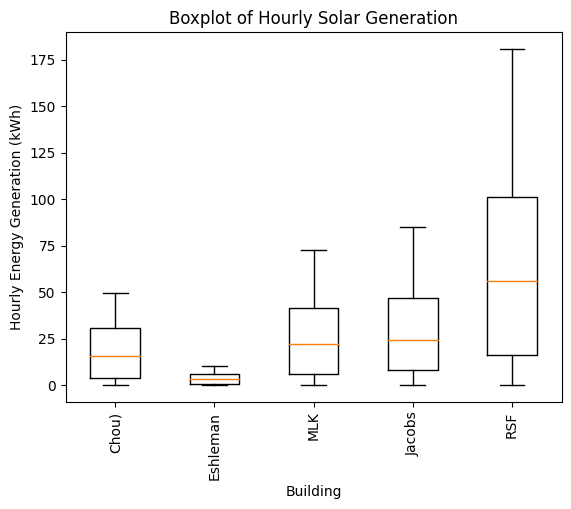

In [41]:
no_time= dayonly[['Chou Future PV Generation',
       'Eshleman Future PV Generation',
       'Jacobs Future PV Generation',
       'MLK Future PV Generation',
       'RSF Future PV Generation',]]
plt.boxplot(no_time, labels=['Chou)', 'Eshleman', 'MLK','Jacobs', 'RSF' ] )
plt.xticks(rotation=90)
plt.xlabel('Building')
plt.ylabel('Hourly Energy Generation (kWh)')
plt.title('Boxplot of Hourly Solar Generation')

Text(0.5, 1.0, 'Boxplot of Normalized Hourly Solar Generation')

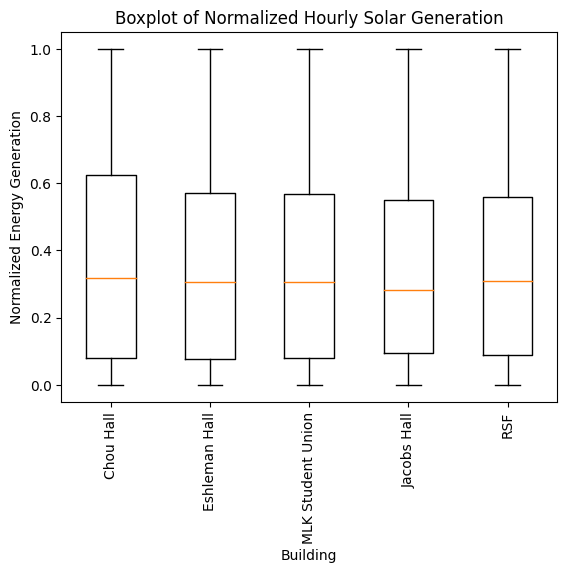

In [43]:
buildings = ['Chou Future PV Generation',
       'Eshleman Future PV Generation',
       'Jacobs Future PV Generation',
       'MLK Future PV Generation',
       'RSF Future PV Generation',]
normalized_energy= pd.DataFrame()
for i in buildings:
    normalized_energy[i] = dayonly[i]/max(dayonly[i])
plt.boxplot(normalized_energy, labels =['Chou Hall', 'Eshleman Hall', 'MLK Student Union','Jacobs Hall', 'RSF' ] )
plt.xticks(rotation=90)
plt.xlabel('Building')
plt.ylabel('Normalized Energy Generation')
plt.title('Boxplot of Normalized Hourly Solar Generation')

These first 2 boxplots show the hourly solar generation and normalized hourly solar generation per building. From these graphs we can see that the RSF has vastly higher levels of generation than the other buildings and Eshleman has by far the lowest. When normalized however the boxplots for the different buildings is remarkably similar with only slight variations in mean and interquartile range.

/tmp/ipykernel_37/2861904909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayonly['Month'] = dayonly['Future Timestamp'].dt.month


Text(0.5, 1.0, 'Average Hourly Generation Per Month Per Building')

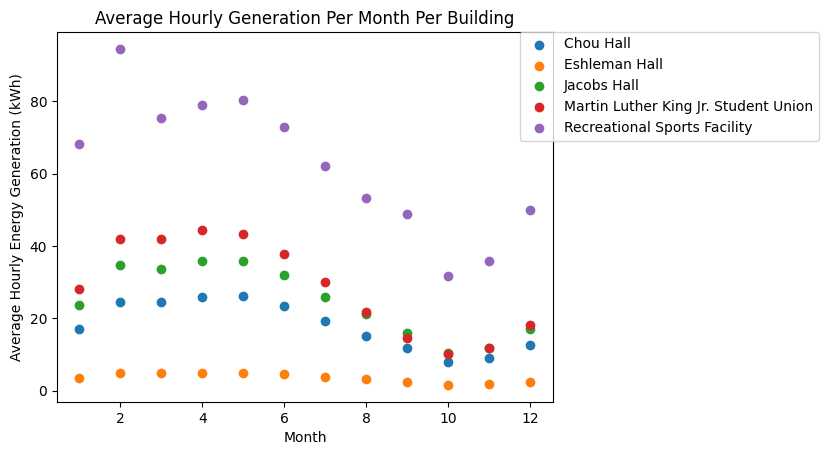

In [45]:
dayonly['Month'] = dayonly['Future Timestamp'].dt.month
building_name = ['Chou Hall',
       'Eshleman Hall',
       'Jacobs Hall',
       'Martin Luther King Jr. Student Union',
       'Recreational Sports Facility',]
for i in buildings:
    plt.scatter(dayonly['Month'].unique(),dayonly.groupby('Month').mean()[i] )
plt.legend(building_name, loc='upper right', bbox_to_anchor=(1.55, 1.02))
plt.xlabel('Month')
plt.ylabel('Average Hourly Energy Generation (kWh)')
plt.title('Average Hourly Generation Per Month Per Building')

This graph is showing the average hourly energy generation per month for each of the buildings. It can be gathered that April and May are the highest generating months while October and November have the lowest levels of generation. Febuary seems to be an outlier that is hard to explain logically as it has higher production levels than the months around it and doesnt seem to follow the cyclical trend shown by the other months. Possible explanations for this includes an unusually sunny Febuary, a change in measurement technique/ method in the month, or cleaning of panels occurs in the month.

/tmp/ipykernel_37/3522545384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayonly['Total']= dayonly[['Chou Future PV Generation',


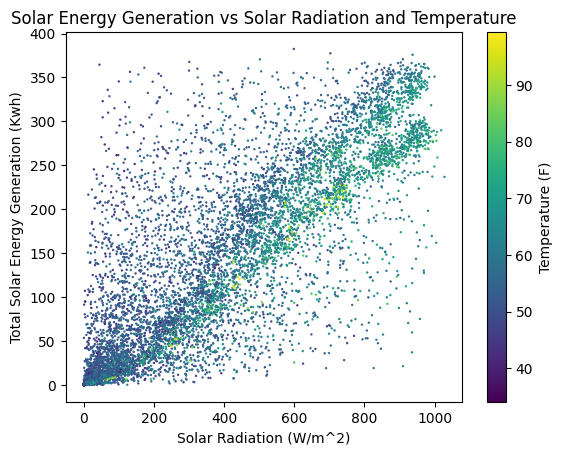

In [47]:
dayonly['Total']= dayonly[['Chou Future PV Generation',
       'Eshleman Future PV Generation',
       'Jacobs Future PV Generation',
       'MLK Future PV Generation',
       'RSF Future PV Generation',]].sum(axis=1)
plt.scatter(dayonly['solar_radiation_set_1'],dayonly['Total'], s=.5, c=dayonly['air_temp_set_1'])
plt.xlabel('Solar Radiation (W/m^2)')
plt.ylabel('Total Solar Energy Generation (Kwh)')
plt.colorbar(label='Temperature (F)')
plt.title('Solar Energy Generation vs Solar Radiation and Temperature')
plt.show()

This is a scatter plot of solar energy generation across the campus vs solar radiation with a color gradient showing temperature. This shows a rather linear relationship between solar radiation and energy generation. However, at the higher ends of the graph the graph seems to split into 2 distinct lines. This could be due to temperature changes as the higher temperature values seem to result in lower energy generation than their lower temperature counterparts.

In [49]:
combined_usage_weather_df_eda= combined_usage_weather_df
combined_usage_weather_df_eda['Weekday']=combined_usage_weather_df_eda['Current Timestamp'].dt.dayofweek
combined_usage_weather_df_eda['Month'] = combined_usage_weather_df_eda['Current Timestamp'].dt.month
combined_usage_weather_df_eda

,Future Timestamp,Future Chou Energy Usage (kWh),Future Eshleman Energy Usage (kWh),Future MLK Energy Usage (kWh),Future Jacobs Energy Usage (kWh),Future RSF Energy Usage (kWh),Current Timestamp,pressure_set_1,air_temp_set_1,air_temp_set_2,...,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d,Weekday,Month
0,2020-07-29 13:00:00,124.806386,234.399,432.441,0.000,73.75,2020-07-28 13:00:00,28.9950,66.3575,61.0800,...,263.050,8.8175,948.2500,0.0,13.0325,53.3925,29.9250,66.3375,1,7
1,2020-07-29 14:00:00,168.578181,240.402,446.609,0.000,65.75,2020-07-28 14:00:00,28.9825,67.5100,61.8025,...,265.425,8.3575,921.7500,0.0,13.0075,53.8725,29.9100,67.4825,1,7
2,2020-07-29 15:00:00,161.571882,232.183,464.657,0.000,52.50,2020-07-28 15:00:00,28.9725,67.7175,61.7525,...,283.050,9.0475,838.2000,0.0,12.9975,53.6075,29.9025,67.6875,1,7
3,2020-07-29 16:00:00,234.894844,240.714,495.088,0.000,29.25,2020-07-28 16:00:00,28.9625,67.4050,61.2825,...,290.375,9.4650,705.3500,0.0,12.9825,53.7675,29.8900,67.3750,1,7
4,2020-07-29 17:00:00,280.377720,255.895,541.700,0.000,7.25,2020-07-28 17:00:00,28.9525,67.0425,60.9175,...,279.350,8.8550,538.3000,0.0,12.9725,53.6250,29.8775,67.0125,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17408,2022-07-27 04:00:00,228.547018,389.902,359.831,39.550,90.75,2022-07-26 04:00:00,28.9800,53.8650,53.8975,...,261.225,10.3250,0.1900,0.0,13.1400,52.6750,29.9300,53.8650,1,7
17409,2022-07-27 05:00:00,259.955048,390.099,375.861,51.235,104.75,2022-07-26 05:00:00,28.9900,53.7900,53.8200,...,222.650,8.1650,0.1275,0.0,13.1325,52.6125,29.9450,53.7900,1,7
17410,2022-07-27 06:00:00,319.280333,437.073,503.289,41.498,116.50,2022-07-26 06:00:00,28.9975,53.7700,53.7725,...,229.100,8.8175,1.6050,0.0,13.1275,52.6000,29.9500,53.7700,1,7
17411,2022-07-27 07:00:00,356.213538,424.817,725.260,38.229,125.75,2022-07-26 07:00:00,29.0125,53.6550,53.6125,...,280.925,9.3125,31.1775,0.0,13.1300,52.4850,29.9625,53.6550,1,7


Text(0.5, 1.0, 'Boxplot of Hourly Energy Usage')

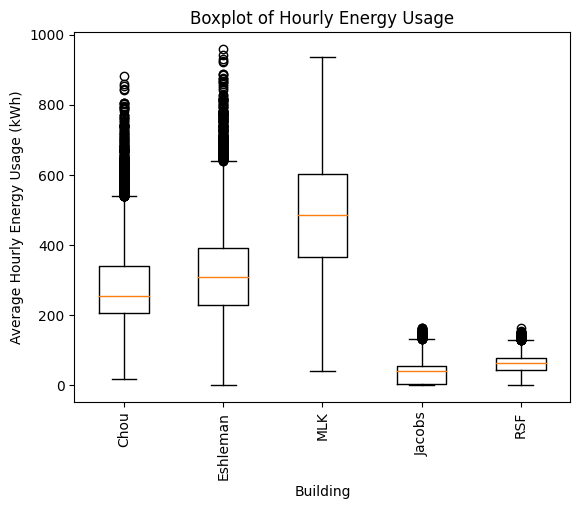

In [53]:
no_time= combined_usage_weather_df_eda[['Future Chou Energy Usage (kWh)', 'Future Eshleman Energy Usage (kWh)', 'Future MLK Energy Usage (kWh)','Future Jacobs Energy Usage (kWh)', 'Future RSF Energy Usage (kWh)' ]]
plt.boxplot(no_time, labels=['Chou', 'Eshleman', 'MLK','Jacobs', 'RSF' ] )
plt.xticks(rotation=90)
plt.xlabel('Building')
plt.ylabel('Average Hourly Energy Usage (kWh)')
plt.title('Boxplot of Hourly Energy Usage')

Text(0.5, 1.0, 'Boxplot of Normalized Hourly Energy Usage')

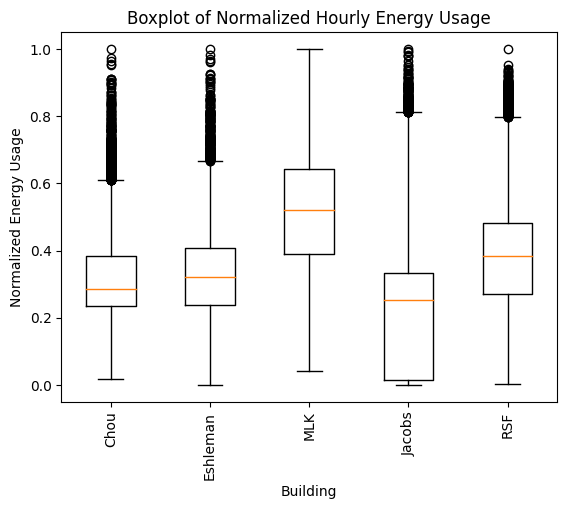

In [57]:
normalized_energy = pd.DataFrame()
buildings_usage = ['Future Chou Energy Usage (kWh)', 'Future Eshleman Energy Usage (kWh)', 'Future MLK Energy Usage (kWh)','Future Jacobs Energy Usage (kWh)', 'Future RSF Energy Usage (kWh)' ]
for i in buildings_usage:
    normalized_energy[i] = combined_usage_weather_df_eda[i]/max(combined_usage_weather_df_eda[i])
plt.boxplot(normalized_energy, labels =['Chou', 'Eshleman', 'MLK','Jacobs', 'RSF' ] )
plt.xticks(rotation=90)
plt.xlabel('Building')
plt.ylabel('Normalized Energy Usage')
plt.title('Boxplot of Normalized Hourly Energy Usage')

These graphs show the hourly energy usage and normalized energy usage for the 5 different buildings. The energy usage is very high in MLK and very low in Jacobs and the RSF. When normalized MLK usage is still higher than the others but RSF usage falls in line with that of Chou and Eshleman. Jacobs retains a below average energy usage which could be due to how recent its construction was compared to the other buildings. 

Text(0.5, 1.0, 'Energy Usage by Day of Week')

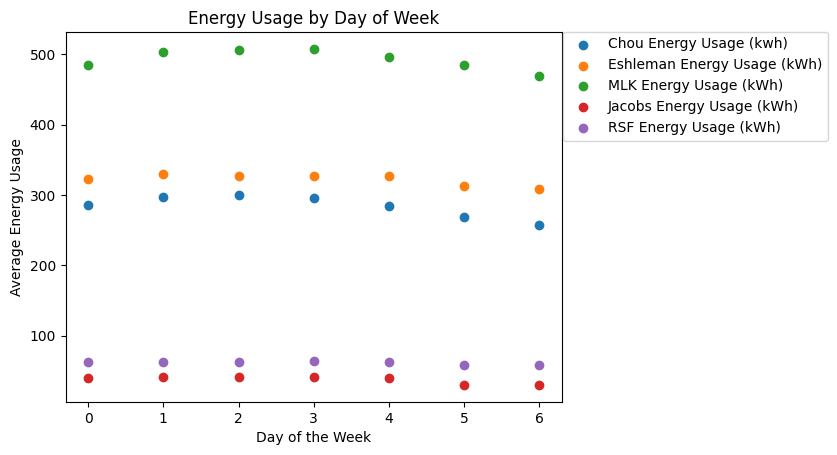

In [59]:
buildings = ['Chou Energy Usage (kwh)', 'Eshleman Energy Usage (kWh)', 'MLK Energy Usage (kWh)','Jacobs Energy Usage (kWh)', 'RSF Energy Usage (kWh)' ]
for i in buildings_usage:
    plt.scatter(combined_usage_weather_df_eda['Weekday'].unique(),combined_usage_weather_df_eda.groupby('Weekday').mean()[i] )
plt.legend(buildings, loc='upper right', bbox_to_anchor=(1.55, 1.02))
plt.xlabel('Day of the Week')
plt.ylabel('Average Energy Usage')
plt.title('Energy Usage by Day of Week')

Text(0.5, 1.0, 'Average Hourly Energy Usage by Month')

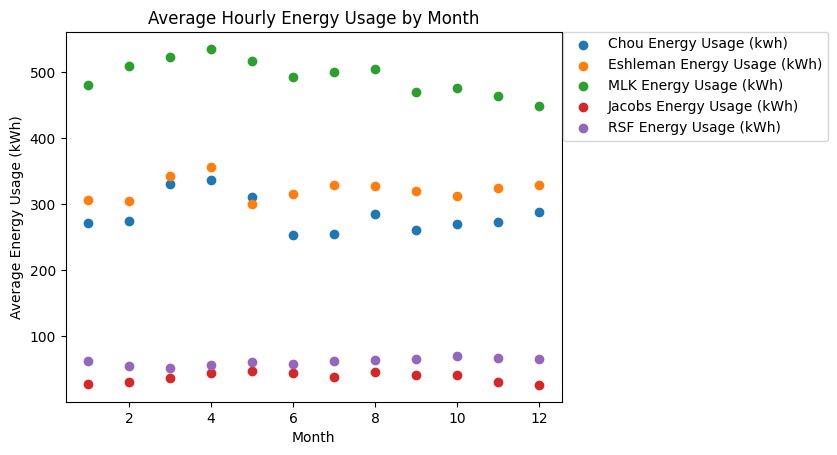

In [61]:
for i in buildings_usage:
    plt.scatter(combined_usage_weather_df_eda['Month'].unique(),combined_usage_weather_df_eda.groupby('Month').mean()[i] )
plt.legend(buildings, loc='upper right', bbox_to_anchor=(1.55, 1.02))
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.title('Average Hourly Energy Usage by Month')

These 2 graphs show the average hourly energy usage by day of week and by month for the 5 buildings. from the graph the weekdays (0-5) have higher energy usages than the weekend this makes sense as class isnt held on weekends so utilities dont need to be run at the same level. The monthly data doesnt have as clear of a pattern as the week chart however it does seem to generally peak in march with lower usage in June and December.

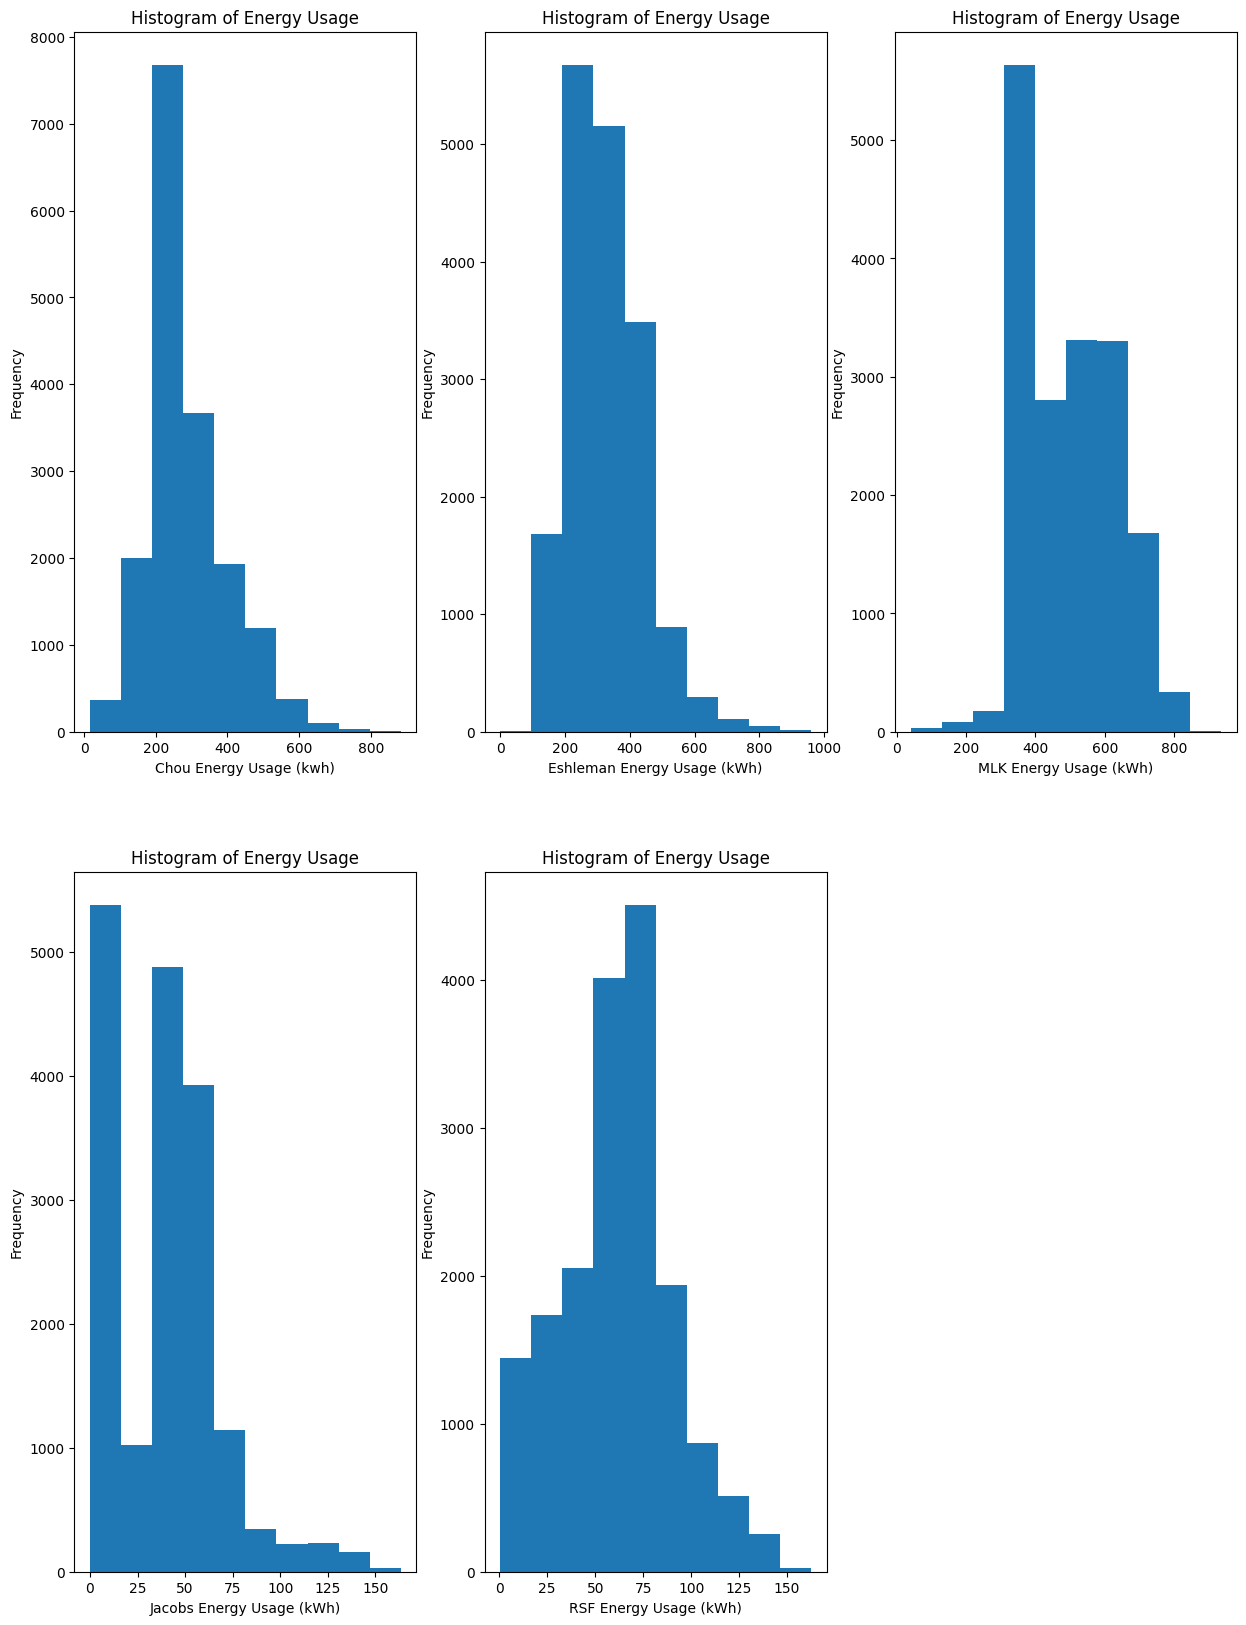

In [70]:
plt.figure(figsize=(15, 20))
x=1
for i in range(0, 5):
    plt.subplot(2, 3, x)
    plt.hist(combined_usage_weather_df_eda[buildings_usage[i]])
    plt.xlabel(buildings[i])
    plt.ylabel('Frequency')
    x= x+1
    plt.title('Histogram of Energy Usage')

These are histograms of energy usage by building. From them we can see the distribution of energy usage. There is probably a baseline usage that most of the buildings need to keep running hence the rightward skew of some of the data. 

## Forecasting and Prediction Modeling

## Prediction Problem 1: Predicting Next Day Solar PV Generation Using Weather Measurements
For each of the five UC Berkeley buildings in our analysis, we aim to predict solar PV generation for the corresponding hour on the following day using the current hour's weather measurements. Specifically, this involves forecasting solar PV output **24 hours into the future** based on the given weather conditions.

### Train/Test Split

In this process, we split the combined solar-weather dataset into training and testing sets (using an 80/20 split), and created separate target variables for each building's future PV generation to perform individual model training and evaluation.

In [73]:
from sklearn.model_selection import train_test_split

# Defining features and targets from combined_solar_weather_df
features = combined_solar_weather_df.drop(columns=['Future Timestamp', 'Current Timestamp', 'Chou Future PV Generation', 'Eshleman Future PV Generation', 'Jacobs Future PV Generation', 'MLK Future PV Generation', 'RSF Future PV Generation'])
targets = combined_solar_weather_df[['Chou Future PV Generation', 'Eshleman Future PV Generation', 'Jacobs Future PV Generation', 'MLK Future PV Generation', 'RSF Future PV Generation']]

# Splitting into train and test (for all buildings)
X_train, X_test, y_train_total, y_test_total = train_test_split(features, targets, test_size = 0.2, random_state=131)

In [75]:
# Creating y_train and y_test for each individual building
y_train_chou = y_train_total[['Chou Future PV Generation']]
y_test_chou = y_test_total[['Chou Future PV Generation']]

y_train_eshleman = y_train_total[['Eshleman Future PV Generation']]
y_test_eshleman = y_test_total[['Eshleman Future PV Generation']]

y_train_jacobs = y_train_total[['Jacobs Future PV Generation']]
y_test_jacobs = y_test_total[['Jacobs Future PV Generation']]

y_train_mlk = y_train_total[['MLK Future PV Generation']]
y_test_mlk = y_test_total[['MLK Future PV Generation']]

y_train_rsf = y_train_total[['RSF Future PV Generation']]
y_test_rsf = y_test_total[['RSF Future PV Generation']]

In [77]:
# Defining a list of building names and their respective y_train and y_test
buildings_list = [
    ('Future Chou PV Generation', y_train_chou, y_test_chou),
    ('Future Eshleman PV Generation', y_train_eshleman, y_test_eshleman),
    ('Future Jacobs PV Generation', y_train_jacobs, y_test_jacobs),
    ('Future MLK PV Generation', y_train_mlk, y_test_mlk),
    ('Future RSF PV Generation', y_train_rsf, y_test_rsf)
]

### Model 1: Linear Regression

First, we built linear regression models on individual buildings to predict next-day solar PV generation.

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse_results = {}
# Defining a generic function to evaluate a Linear Regression model given train and test data
def eval_linreg(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2 = r2_score(y_train, y_pred_train)
    osr2 = r2_score(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    print("Number of Predictors:", len(features.columns))
    print("R^2:", r2)
    print("OSR^2:", osr2)
    print("RMSE:", rmse)

    rmse_results[target] = rmse

    return model

Our evaluation metrics for Linear Regression are calculated below:

In [81]:
# Evaluating Linear Regression on each of the 5 individual buildings
linreg_models = {}
for target, y_train, y_test in buildings_list:
    print('Linear Regression on:', target)
    linreg_models[target] = eval_linreg(X_train, X_test, y_train, y_test)
    print('\n---\n')

Linear Regression on: Future Chou PV Generation
Number of Predictors: 13
R^2: 0.8363702088126871
OSR^2: 0.823735396664534
RMSE: 5.65539783078853

---

Linear Regression on: Future Eshleman PV Generation
Number of Predictors: 13
R^2: 0.8233475138400358
OSR^2: 0.807617184847696
RMSE: 1.151255131529451

---

Linear Regression on: Future Jacobs PV Generation
Number of Predictors: 13
R^2: 0.8383309384621674
OSR^2: 0.8228307490458255
RMSE: 7.703105323904114

---

Linear Regression on: Future MLK PV Generation
Number of Predictors: 13
R^2: 0.8489663015944977
OSR^2: 0.8377334485579313
RMSE: 8.546759501850143

---

Linear Regression on: Future RSF PV Generation
Number of Predictors: 13
R^2: 0.7681031697107579
OSR^2: 0.7615769567140551
RMSE: 22.491068955222932

---



See averaged metrics below for our **Linear Regression** model for predicting next day solar PV generation:
- Avg. $R^2$: 0.8230
- Avg. $OSR^2$: 0.8107
- Avg. RMSE: 11.5891

Below is a comparison of our RMSE results to show how the linear regression model performed across the 5 buildings. We can see that Eshleman and Chou Hall have the lowest RMSE scores, which aligns what we observed in our EDA because both of those buildings generated less solar PV overall. The RSF has a noticeably higher RMSE because it produces the most solar PV compared to the other buildings.

(0.0, 26.989282746267516)

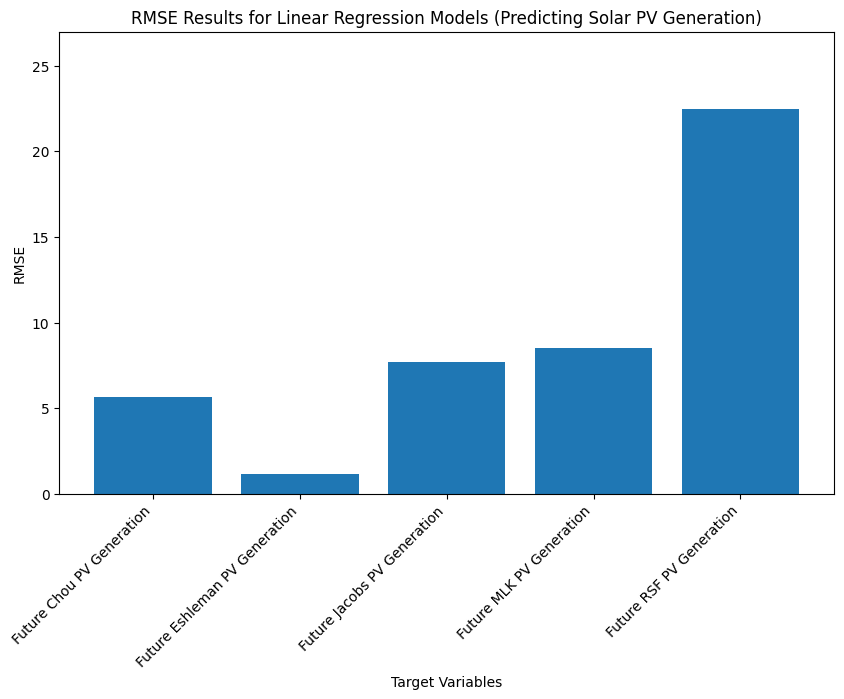

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(rmse_results.keys(), rmse_results.values())
plt.title('RMSE Results for Linear Regression Models (Predicting Solar PV Generation)')
plt.xlabel('Target Variables')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(rmse_results.values()) * 1.2)  # Adding some margin above the highest bar

### Model 2: Lasso Regression

For our second model, we tried lasso regression to see if addressing overfitting and improving generalizability would improve our results.

In [27]:
from sklearn.linear_model import Lasso

# Defining a generic function to evaluate a Lasso Regression model given train and test data
def eval_lasso(X_train, X_test, y_train, y_test):
    lasso = Lasso(alpha = 0.1)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    r2_lasso = r2_score(y_train, y_pred_train)
    osr2_lasso = r2_score(y_test, y_pred_test)
    rmse_lasso = mean_squared_error(y_test, y_pred_test, squared=False)

    print("R^2:", r2_lasso)
    print("OSR^2:", osr2_lasso)
    print("RMSE:", rmse_lasso)

    return lasso

Our evaluation metrics for Lasso Regression are calculated below:

In [28]:
# Evaluating Lasso Regression on each of the 5 individual buildings
lasso_models = {}
for target, y_train, y_test in buildings_list:
    print('Lasso Regression on:', target)
    lasso_models[target] = eval_lasso(X_train, X_test, y_train, y_test)
    print('\n---\n')

Lasso Regression on: Future Chou PV Generation
R^2: 0.8359459337396962
OSR^2: 0.8231365837060616
RMSE: 5.66499605444942

---

Lasso Regression on: Future Eshleman PV Generation
R^2: 0.8224924132200124
OSR^2: 0.8064048634991747
RMSE: 1.1548768149372164

---

Lasso Regression on: Future Jacobs PV Generation
R^2: 0.8379314018312124
OSR^2: 0.8222396097774369
RMSE: 7.715945633314225

---

Lasso Regression on: Future MLK PV Generation
R^2: 0.8487715848929638
OSR^2: 0.8371037254308669
RMSE: 8.56332755140005

---

Lasso Regression on: Future RSF PV Generation
R^2: 0.7678719685572832
OSR^2: 0.7613380289096889
RMSE: 22.502335475530334

---

/root/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+06, tolerance: 3.027e+03
  model = cd_fast.enet_coordinate_descent(


See averaged metrics below for our **Lasso Regression** model for predicting next day solar PV generation:
- Avg. $R^2$: 0.8226
- Avg. $OSR^2$: 0.8100
- Avg. RMSE: 9.12

These results are not a noticeable improvement from the linear regression model, indicating that our linear model is already pretty optimal. Next, we will try Cross-Validated Lasso Regression to optimize the model by selecting the best regularization parameter (alpha), which helps prevent overfitting and improve generalization to unseen data.

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

# Defining a generic function to evaluate a 10-Fold cross-validated Lasso Regression model given train and test data
# A K of 10 was choosen to optimize for more robust exploration for cross-validation
def eval_cv_lasso(X_train, X_test, y_train, y_test):
    alphas_lasso = np.linspace(0.01, .1, 51)
    kf = KFold(n_splits = 10, shuffle = True, random_state = 131) # get KFold cross-validation selector object
    lassocv = LassoCV(cv = kf, alphas=alphas_lasso) # pass CV object and list of alphas to LassoCV()
    lassocv.fit(X_train, y_train) # fit RidgeCV model on training data
    y_pred_train = lassocv.predict(X_train)
    y_pred_test = lassocv.predict(X_test)

    r2_cv_lasso = r2_score(y_train, y_pred_train)
    osr2_cv_lasso = r2_score(y_test, y_pred_test)
    rmse_cv_lasso = mean_squared_error(y_test, y_pred_test, squared=False)

    print("Optimal Alpha:", lassocv.alpha_)
    print("R^2:", r2_cv_lasso)
    print("OSR^2:", osr2_cv_lasso)
    print("RMSE:", rmse_cv_lasso)

    return lassocv

In [30]:
# Evaluating CV Lasso Regression on each of the 5 individual buildings
lasso_cv_models = {}
for target, y_train, y_test in buildings_list:
    print('CV Lasso Regression on:', target)
    lasso_cv_models[target] = eval_cv_lasso(X_train, X_test, y_train, y_test)
    print('\n---\n')
# For the CV Lasso models, the models were evaluated on each of the 5 individual buildings on separate machines due to computuational limitations.
# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.
# The results of the models are displayed here for your convenience:

```
CV Lasso Regression on: Chou Future PV Generation
Optimal Alpha: 0.0172
R^2: 0.8361352225116258
OSR^2: 0.8232004129324924
MSE: 32.08059837068321

---

CV Lasso Regression on: Eshleman Future PV Generation
Optimal Alpha: 0.01
R^2: 0.8229923209828284
OSR^2: 0.8070782856231459
MSE: 1.3291010315654699

---

CV Lasso Regression on: Jacobs Future PV Generation
Optimal Alpha: 0.0262
R^2: 0.8380585594319789
OSR^2: 0.8222737296420222
MSE: 59.52438953226387

---

CV Lasso Regression on: MLK Future PV Generation
Optimal Alpha: 0.0244
R^2: 0.8488461254139775
OSR^2: 0.8372624884856978
MSE: 73.25910881425162

---

CV Lasso Regression on: RSF Future PV Generation
Optimal Alpha: 0.0298
R^2: 0.7679100313081051
OSR^2: 0.7612593585089729
MSE: 506.52201222694714
```

See averaged metrics below for our **Cross-Validated Lasso Regression** model for predicting next day solar PV generation:
- Avg. $R^2$: 0.8228
- Avg. $OSR^2$: 0.8102
- Avg. RMSE: 11.5992

These results only show a slight improvement from the normal Lasso model.

#### Linear and Lasso Regression Analysis

This scatter plot compares the predicted values (y-axis) against the actual values (x-axis). The red dashed line represents the "ideal fit," where predicted = actual. We notice a non-linear curvature in the graph, which indicates non-linear trends in the data.

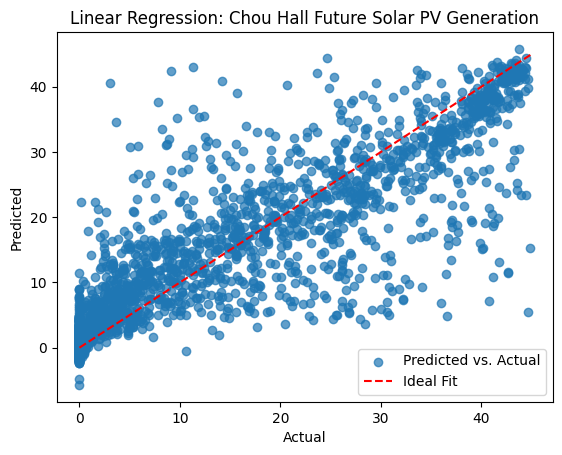

In [31]:
model_chou = LinearRegression()
model_chou.fit(X_train, y_train_chou)
y_pred_chou = model_chou.predict(X_test)

plt.scatter(y_test_chou, y_pred_chou, alpha=0.7, label="Predicted vs. Actual")
plt.plot([y_test_chou.min(), y_test_chou.max()], [y_test_chou.min(), y_test_chou.max()], 'r--', label='Ideal Fit')
plt.title('Linear Regression: Chou Hall Future Solar PV Generation')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

The scatter plot below shows residuals (actual - predicted) on the y-axis versus the predicted values on the x-axis. The red dashed line at y = 0 indicates where residuals should ideally cluster if the model predictions were unbiased. A clear, rectangular pattern appears in the residuals, which confirms that the model does not adequately capture non-linear trends in the data.

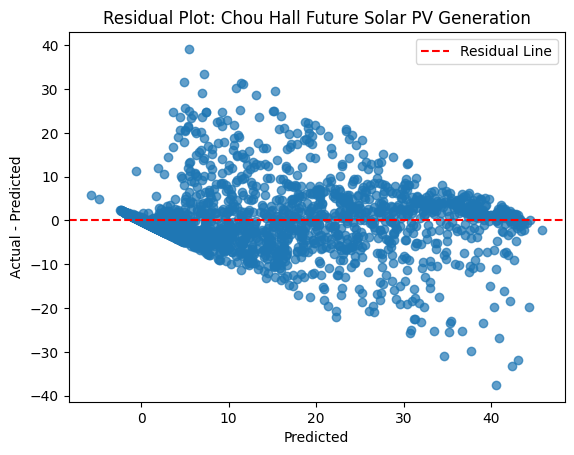

In [32]:
chou_residuals = y_test_chou - y_pred_chou

plt.scatter(y_pred_chou, chou_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Residual Line')
plt.title('Residual Plot: Chou Hall Future Solar PV Generation')
plt.xlabel('Predicted')
plt.ylabel('Actual - Predicted')
plt.legend()

When we analyze the plots and residual graphs for the Linear Regression and Lasso models, we can see that a pattern still exists in the residuals.
Thus, it is likely the a polynomial regresion model is needed, as a linear relationship doesn't seem to capture the underlying trend.

### Model 3: Polynomial Lasso Regression

To capture non-linear trends, we used Polynomial Lasso Regression to model non-linear relationships while using regularization to prevent overfitting and select the most relevant features.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# Defining a generic function to evaluate a Polynomial Lasso Regression model given train and test data
def eval_poly_lasso(degree, opt_alpha, X_train, X_test, y_train, y_test):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_model = Lasso(alpha=opt_alpha).fit(X_train_poly, y_train) # Use the optimal alpha value from the CV Lasso model above

    y_pred_train = poly_model.predict(X_train_poly)
    y_pred_test = poly_model.predict(X_test_poly)

    r2_poly = r2_score(y_train, y_pred_train)
    osr2_poly = r2_score(y_test, y_pred_test)
    mse_poly = mean_squared_error(y_test, y_pred_test)

    print("Degree:", degree)
    print("R^2:", r2_poly)
    print("OSR^2:", osr2_poly)
    print("MSE:", mse_poly)

    return poly_model

In [34]:
# Evaluating Polynomial Lasso Regression on each of the 5 indivudual buildings, for order 1 through 5

opt_alphas = [0.0172, 0.01, 0.0262, 0.0244, 0.0298] # Optimal alpha values for each building from the CV Lasso model above
poly_lasso_models = {}
for d in range(1, 7): # Iterating through orders 1 to 6
    for i, vals in enumerate(buildings_list):
        target, y_train, y_test = vals
        print('Polynomial Lasso Regression on:', target)
        poly_lasso_models[(target, d)] = eval_poly_lasso(d, opt_alphas[i], X_train, X_test, y_train, y_test) # Use the optimal alpha value corresponding to the building
        print('\n---\n')

# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.

For the Polynomial Lasso models, the models were evaluated on each of the 5 individual buildings on separate machines due to computational limitations. The results of the models are displayed here (for the sake of brevity, only the results of the optimal order (5) are shown):

```
Polynomial Lasso Regression on: Chou Future PV Generation
Degree: 5
R^2: 0.8747639745012439
OSR^2: 0.8598097427930413
MSE: 25.437770594011482

---

Polynomial Lasso Regression on: Eshleman Future PV Generation
Degree: 5
R^2: 0.8620025882150864
OSR^2: 0.8438965153928579
MSE: 1.0754481582981887

---

Polynomial Lasso Regression on: Jacobs Future PV Generation
Degree: 5
R^2: 0.8728353987218214
OSR^2: 0.8574217207094181
MSE: 47.75256363754295

---

Polynomial Lasso Regression on: MLK Future PV Generation
Degree: 5
R^2: 0.8855340156334933
OSR^2: 0.8746241372972561
MSE: 56.44011563746799

---

Polynomial Lasso Regression on: RSF Future PV Generation
Degree: 5
R^2: 0.8330953822544005
OSR^2: 0.823568562120741
MSE: 374.32423058164
```

From evaluations on our separate machines, we've seen that the optimal order is 5. We determined this by running the polynomial lasso model for increasing degrees, and observing the training metrics outputed (R^2). (We want to avoid using MSE and OSR^2 to determine our optimal order, as that violates the cross validation process).

Because Lasso performs feature selection, we know that the optimal order has been selected once the scores start to stop improving significantly, even if the degree increases. This is because increasing the order of the polynomial would then be adding more features that aren't relevant, which Lasso then sets to 0.

Looking at the performance metrics outputed by the Polynomial Lasso Regression Models, our performance metrics improved significantly, which indicates the relationship between the target and features was indeed not linear.

Example $R^2$ metrics outputed by the **Polynomial Lasso Regression Model** for Chou for each order can be seen below:
```
Degree: 1 
R^2: 0.8361345357811231

Degree: 2 
R^2: 0.8453877326814052

Degree: 3
R^2: 0.8617101594970569

Degree: 4
R^2: 0.8695924708888141

Degree: 5
R^2: 0.8747639745012439

Degree: 6
R^2: 0.878701978129351
```
We can see that after order 5, the $R^2$ improvement starts to stagnate, which indicates that the optimal order is 5. We do not want to continue to increase the order of the polynomial, as this would increase the risk of overfitting.

### Model 4: Random Forest

For our next non-linear model, we decided to use Random Forest Regression due to its ability to capture complex non-linear relationships and interactions between features, making it well-suited for modeling the variability and patterns in our dataset without requiring extensive parameter tuning.

#### Random Forest Data Processing + Train/Test Split

In [35]:
# Melting the solar PV generation dataset, allowing for a single random forest model to be trained on all 5 buildings
id_cols = ['Future Timestamp', 'Current Timestamp', 'pressure_set_1', 'air_temp_set_1', 'air_temp_set_2', 'relative_humidity_set_1', 'wind_speed_set_1', 'wind_direction_set_1', 'wind_gust_set_1', 'solar_radiation_set_1','precip_accum_fifteen_minute_set_1', 'volt_set_1', 'dew_point_temperature_set_1d', 'sea_level_pressure_set_1d', 'wet_bulb_temp_set_1d']
solar_melted_df = combined_solar_weather_df.melt(id_vars=id_cols, var_name='Building', value_name='PV Generation')
solar_melted_df['Building'] = solar_melted_df['Building'].str.replace(' Future PV Generation', '')
solar_melted_df.head()

,Future Timestamp,Current Timestamp,pressure_set_1,air_temp_set_1,air_temp_set_2,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d,Building,PV Generation
0,2022-11-01 15:00:00,2022-10-31 15:00:00,28.925000,58.2600,57.8375,75.385000,2.9575,277.350000,5.610000,392.200000,0.0,13.025000,50.430000,29.865000,58.260000,Chou,26.68750
1,2022-11-01 16:00:00,2022-10-31 16:00:00,28.913333,58.9725,58.5675,73.146667,3.1700,272.533333,7.176667,374.433333,0.0,13.010000,50.200000,29.856667,58.863333,Chou,13.09375
2,2022-11-01 17:00:00,2022-10-31 17:00:00,28.910000,55.5650,55.4075,78.516667,4.3000,276.666667,7.480000,103.123333,0.0,13.006667,49.493333,29.850000,56.196667,Chou,2.59375
3,2022-11-01 18:00:00,2022-10-31 18:00:00,28.902500,53.2100,53.1675,85.232500,2.7200,219.187500,5.112500,12.115000,0.0,13.055000,48.842500,29.852500,53.210000,Chou,0.15625
4,2022-11-01 19:00:00,2022-10-31 19:00:00,28.905000,51.4850,51.3800,90.240000,2.5300,263.000000,5.840000,0.000000,0.0,13.095000,48.690000,29.857500,51.485000,Chou,0.00000


To simplify the modeling process, we melted the features and targets across all buildings into a single dataset. By applying dummy encoding to the "Building" feature, we allowed a single Random Forest model to predict PV Generation for all buildings collectively instead of training separate models for each building.

In [36]:
# Dummy encoding melted features for random forest
melted_features = solar_melted_df.drop(columns=['Future Timestamp', 'Current Timestamp', 'PV Generation'])
melted_features = pd.get_dummies(melted_features, columns=['Building'])

melted_targets = solar_melted_df['PV Generation']

# Train/Test Split for the melted features + targets
X_train_melted, X_test_melted, y_train_melted, y_test_melted = train_test_split(melted_features, melted_targets, test_size = 0.2, random_state=131)

#### Model Evalutation

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Defining a generic function to evaluate a Random Forest model given train and test data
def eval_rf(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(random_state=131)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)

    print(f"R^2: {rf.score(X_train, y_train)}")
    print(f"OSR^2: {rf.score(X_test, y_test)}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")    
    
    return rf

Our evaluation metrics for Random Forest are calculated across all buildings:

In [38]:
# Evaluating the Random Forest model
print("All Buildings RF:")
rf_model = eval_rf(X_train_melted, X_test_melted, y_train_melted, y_test_melted)

All Buildings RF:
R^2: 0.9839718345956353
OSR^2: 0.8826406775999079
RMSE: 9.316854847246013


To improve our Random Forest Model even more, we used 5-Fold Cross-Validation to tune the number of max features that each split considers.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Defining a generic function to evaluate a 5-Fold cross-validated Random Forest model given train and test data
# A K of 5 was choosen to balance both optimization and computational performance
def eval_cv_rf(X_train, X_test, y_train, y_test):
    len_cols = len(X_train.columns)
    param_dist = {'max_features': np.linspace(1, len_cols, len_cols, dtype='int32')}

    rf_cv = RandomizedSearchCV(RandomForestRegressor(random_state=131),
                                        param_distributions=param_dist, 
                                        cv=5, n_iter=5, random_state = 131)
    rf_cv.fit(X_train, y_train)

    y_pred_rf = rf_cv.predict(X_test)

    print("Optimal Params:", rf_cv.best_params_)
    print(f"R^2: {rf_cv.score(X_train, y_train)}")
    print(f"OSR^2: {rf_cv.score(X_test, y_test)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
    
    return rf_cv

In [40]:
# Evaluating the CV Random Forest model
print("All Buildings CV RF:")
rf_cv_model = eval_cv_rf(X_train_melted, X_test_melted, y_train_melted, y_test_melted)
# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.

For the Cross-Validated Random Forest model, the model was evaluated on a separate machine due to computational limitations. The results of the model are displayed below for your convenience:

```
All Buildings CV RF:
Optimal Params: {'max_features': 5}
R^2: 0.9846712747067667
OSR^2: 0.8892788567861982
MSE: 81.89391375392326
```

#### Random Forest Feature Importance

We used Random Forest feature importance to identify and rank the most influential features in predicting Solar PV generation, allowing us to see which variables (e.g., weather metrics, building identifiers) had the greatest impact on the model's predictions. 

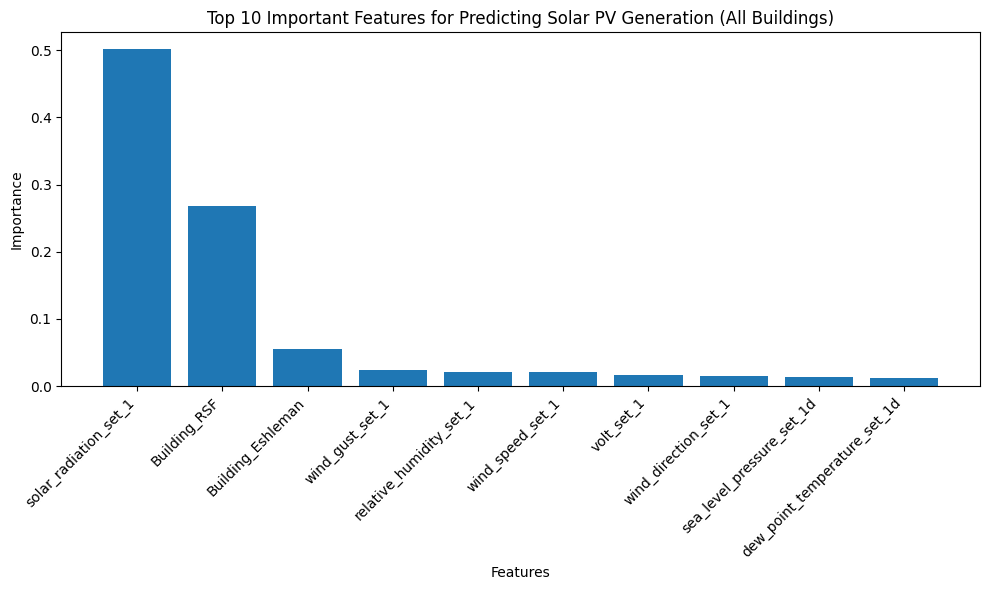

In [41]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train_melted.columns

# Combine feature names and their importance values
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Important Features for Predicting Solar PV Generation (All Buildings)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prediction Problem 2: Predicting Next Day Energy Usage Using Weather Measurements
For each of the five UC Berkeley buildings under analysis, we aim to predict the building's energy usage for the corresponding hour on the next day based on the current hour's weather measurements.

### Adding Additional Features + Train/Test Split
In our initial testing, the models for predicting energy usage performs quite poorly. Thus, we decided to add additional relevant features to help boost the performance of the models

In [89]:
# Adding an additional feature of the Current Building Energy Usage to the data
curr_usage_df = combined_usage_df.rename(columns={'Chou Energy Usage (kWh)': 'Current Chou Energy Usage (kWh)', 'Eshleman Energy Usage (kWh)': 'Current Eshleman Energy Usage (kWh)', 'MLK Energy Usage (kWh)': 'Current MLK Energy Usage (kWh)', 'Jacobs Energy Usage (kWh)': 'Current Jacobs Energy Usage (kWh)', 'RSF Energy Usage (kWh)': 'Current RSF Energy Usage (kWh)', 'Future Timestamp': 'Current Timestamp'}).drop(columns=['Timestamp_Minus_24h'])
combined_usage_weather_df = pd.merge(combined_usage_weather_df, curr_usage_df, left_on='Current Timestamp', right_on='Current Timestamp', how='inner')

In [92]:
# Adding additional features corresponding to the timestamp of the data
combined_usage_weather_df['Hour of Day'] = combined_usage_weather_df['Current Timestamp'].dt.hour
combined_usage_weather_df['Current Day of Week'] = combined_usage_weather_df['Current Timestamp'].dt.dayofweek
combined_usage_weather_df['Future Day of Week'] = combined_usage_weather_df['Future Timestamp'].dt.dayofweek

In [94]:
# Defining features and targets from combined_usage_weather_df
features = combined_usage_weather_df.drop(columns=['Future Timestamp', 'Current Timestamp', 'Future Chou Energy Usage (kWh)', 'Future Eshleman Energy Usage (kWh)', 'Future Jacobs Energy Usage (kWh)', 'Future MLK Energy Usage (kWh)', 'Future RSF Energy Usage (kWh)'])
targets = combined_usage_weather_df[['Future Chou Energy Usage (kWh)', 'Future Eshleman Energy Usage (kWh)', 'Future Jacobs Energy Usage (kWh)', 'Future MLK Energy Usage (kWh)', 'Future RSF Energy Usage (kWh)']]
X_train, X_test, y_train_total, y_test_total = train_test_split(features, targets, test_size = 0.2, random_state=131)

In [98]:
# Creating y_train and y_test for each individual building
y_train_chou = y_train_total[['Future Chou Energy Usage (kWh)']]
y_test_chou = y_test_total[['Future Chou Energy Usage (kWh)']]

y_train_eshleman = y_train_total[['Future Eshleman Energy Usage (kWh)']]
y_test_eshleman = y_test_total[['Future Eshleman Energy Usage (kWh)']]

y_train_jacobs = y_train_total[['Future Jacobs Energy Usage (kWh)']]
y_test_jacobs = y_test_total[['Future Jacobs Energy Usage (kWh)']]

y_train_mlk = y_train_total[['Future MLK Energy Usage (kWh)']]
y_test_mlk = y_test_total[['Future MLK Energy Usage (kWh)']]

y_train_rsf = y_train_total[['Future RSF Energy Usage (kWh)']]
y_test_rsf = y_test_total[['Future RSF Energy Usage (kWh)']]

In [100]:
# Defining a list of building names and their respective y_train and y_test
buildings_list = [
    ('Future Chou Energy Usage (kWh)', y_train_chou, y_test_chou),
    ('Future Eshleman Energy Usage (kWh)', y_train_eshleman, y_test_eshleman),
    ('Future Future Jacobs Energy Usage (kWh)', y_train_jacobs, y_test_jacobs),
    ('Future MLK Energy Usage (kWh)', y_train_mlk, y_test_mlk),
    ('Future RSF Energy Usage (kWh)', y_train_rsf, y_test_rsf)
]

### Model 1: Linear Regression

First, we tested our linear regression model on individual buildings to predict next-day energy usage.

In [102]:
# Evaluating Linear Regression on each of the 5 individual buildings, using the generic eval_linreg function defined in the previous prediction problem
linreg_models = {}
for target, y_train, y_test in buildings_list:
    print('Linear Regression on:', target)
    linreg_models[target] = eval_linreg(X_train, X_test, y_train, y_test)
    print('\n---\n')

Linear Regression on: Future Chou Energy Usage (kWh)
Number of Predictors: 26
R^2: 0.6716116886001924
OSR^2: 0.6871030732507013
RMSE: 62.6282607396492

---

Linear Regression on: Future Eshleman Energy Usage (kWh)
Number of Predictors: 26
R^2: 0.7298749357397829
OSR^2: 0.7358465535029379
RMSE: 56.83664719518267

---

Linear Regression on: Future Future Jacobs Energy Usage (kWh)
Number of Predictors: 26
R^2: 0.7680662577878266
OSR^2: 0.7554916164341293
RMSE: 14.83374345617663

---

Linear Regression on: Future MLK Energy Usage (kWh)
Number of Predictors: 26
R^2: 0.731395749787235
OSR^2: 0.7498362813856487
RMSE: 67.3430972642648

---

Linear Regression on: Future RSF Energy Usage (kWh)
Number of Predictors: 26
R^2: 0.7308027488391183
OSR^2: 0.7058555288217014
RMSE: 15.56170406772295

---



See averaged metrics below for our **Linear Regression** model for predicting next day energy usage:
- Avg. $R^2$: 0.7260
- Avg. $OSR^2$: 0.7265
- Avg. RMSE: 49.3014

#### Linear and Lasso Regression Analysis

This scatter plot shows the predicted vs. actual values for energy usage in Chou Hall using a Linear Regression model. While the model captures the general trend, the dispersion around the line indicates some prediction errors, suggesting the model may not fully capture all underlying patterns in the data.

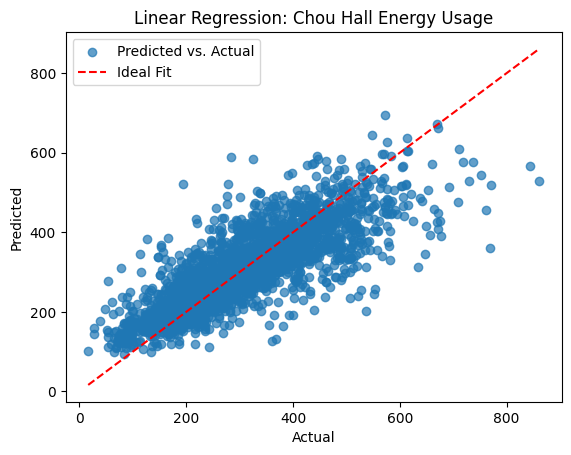

In [104]:
model_chou = LinearRegression()
model_chou.fit(X_train, y_train_chou)
y_pred_chou = model_chou.predict(X_test)

plt.scatter(y_test_chou, y_pred_chou, alpha=0.7, label="Predicted vs. Actual")
plt.plot([y_test_chou.min(), y_test_chou.max()], [y_test_chou.min(), y_test_chou.max()], 'r--', label='Ideal Fit')
plt.title('Linear Regression: Chou Hall Energy Usage')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

This residual plot shows the differences between the actual and predicted values for Chou Hall's energy usage, plotted against the predicted values. The residuals appear randomly scattered around zero, which indicates that the linear regression model does not exhibit systematic bias, though the spread suggests variability that the model may not fully capture.

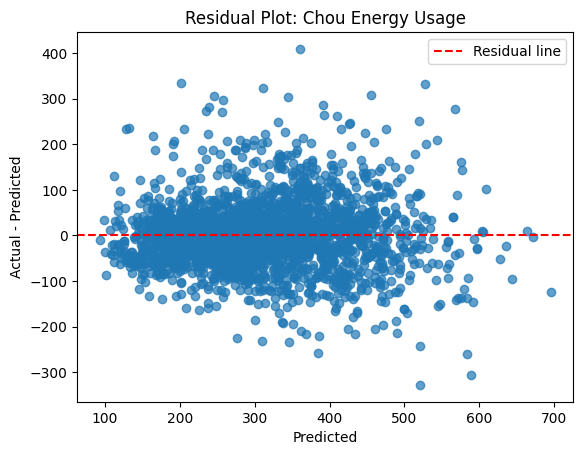

In [106]:
chou_residuals = y_test_chou - y_pred_chou

plt.scatter(y_pred_chou, chou_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Residual Line')
plt.title('Residual Plot: Chou Energy Usage')
plt.xlabel('Predicted')
plt.ylabel('Actual - Predicted')
plt.legend()

### Model 2: Lasso Regression

For our second model, we tried lasso regression to see if addressing overfitting and improving generalizability would improve our results.

In [49]:
# Evaluating Lasso Regression on each of the 5 individual buildings, using the generic eval_lasso function defined in the previous prediction problem
lasso_models = {}
for target, y_train, y_test in buildings_list:
    print('Lasso Regression on:', target)
    lasso_models[target] = eval_lasso(X_train, X_test, y_train, y_test)
    print('\n---\n')

Lasso Regression on: Future Chou Energy Usage (kWh)
/root/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+07, tolerance: 1.715e+04
  model = cd_fast.enet_coordinate_descent(
R^2: 0.6710367617991846
OSR^2: 0.6872388127220931
RMSE: 62.6146747174484

---

Lasso Regression on: Future Eshleman Energy Usage (kWh)
R^2: 0.729290831042184
OSR^2: 0.7349287788380366
RMSE: 56.93529819724742

---

Lasso Regression on: Future Future Jacobs Energy Usage (kWh)
/root/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.927e+05, tolerance: 1.247e+03
  model = cd_fast.en

See averaged metrics below for our **Lasso Regression** model for predicting next day energy usage:
- Avg. $R^2$: 0.7253
- Avg. $OSR^2$: 0.7256
- Avg. RMSE: 43.50

In [50]:
# Evaluating CV Lasso Regression on each of the 5 indivudual buildings, using the generic eval_cv_lasso function defined in the previous prediction problem
lasso_cv_models = {}
for target, y_train, y_test in buildings_list:
    print('CV Lasso Regression on:', target)
    lasso_cv_models[target] = eval_cv_lasso(X_train, X_test, y_train, y_test)
    print('\n---\n')

# For the CV Lasso models, the models were evaluated on each of the 5 individual buildings on separate machines due to computuational limitations.
# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.
# The results of the models (using the previously defined generic eval_cv_lasso function) are displayed here for your convenience:

```
CV Lasso Regression on: Future Chou Energy Usage (kWh)
Optimal Alpha: 0.01
R^2: 0.671502348038872
OSR^2: 0.687541311086422
MSE: 3916.805541430461

---

CV Lasso Regression on: Future Eshleman Energy Usage (kWh)
Optimal Alpha: 0.01
R^2: 0.729748495450399
OSR^2: 0.7353623818528497
MSE: 3236.325531408541

---

CV Lasso Regression on: Future Future Jacobs Energy Usage (kWh)
Optimal Alpha: 0.01
R^2: 0.7679817437687115
OSR^2: 0.7550828949645048
MSE: 220.4077648255973

---

CV Lasso Regression on: Future MLK Energy Usage (kWh)
Optimal Alpha: 0.01
R^2: 0.7313618478417201
OSR^2: 0.7497495073614587
MSE: 4536.665831964145

---

CV Lasso Regression on: Future RSF Energy Usage (kWh)
Optimal Alpha: 0.01
R^2: 0.730594782684111
OSR^2: 0.7048713111832525
MSE: 242.97693147581163
```

See averaged metrics below for our **Cross-Validated Lasso Regression** model for predicting next day energy usage:
- Avg. $R^2$: 0.7262
- Avg. $OSR^2$: 0.7265
- Avg. RMSE: 43.45

Once again, cross-validation did not yield a significant improvement in model performance. Next, we will explore non-linear models to better capture the underlying non-linear trends in the data.

### Model 3: K-Nearest Neighbors

Next, we explored K-Nearest Neighbors (KNN) Regression as a distinct approach for predicting energy usage. Using cross-validation, we fine-tuned the model to identify the optimal k-value for each building, which determines the number of neighbors considered for making predictions.

In [110]:
from sklearn.neighbors import KNeighborsRegressor

# Defining a generic function to evaluate a KNN model given train and test data
def eval_knn(X_train, X_test, y_train,y_test):
    knn_model = KNeighborsRegressor(n_neighbors=5) # Value of 5 choosen arbitrary, can be optimized with CV

    knn_model.fit(X_train, y_train)

    y_pred_train = knn_model.predict(X_train)
    y_pred_test = knn_model.predict(X_test)

    rmse_knn = mean_squared_error(y_test, y_pred_test, squared=False)
    osr2_knn = r2_score(y_test, y_pred_test)
    r2_knn = r2_score(y_train, y_pred_train)

    print(f"R^2: {r2_knn}")
    print(f"OSR^2: {osr2_knn}")
    print(f"RMSE: {rmse_knn}")

    return knn_model

In [112]:
# Evaluating KNN on each of the 5 individual buildings
knn_models = {}
for target, y_train, y_test in buildings_list:
    print('KNN on:', target)
    knn_models[target] = eval_knn(X_train, X_test, y_train, y_test)
    print('\n---\n')

KNN on: Future Chou Energy Usage (kWh)
R^2: 0.777181487377945
OSR^2: 0.6586147399805785
RMSE: 65.41722012789452

---

KNN on: Future Eshleman Energy Usage (kWh)
R^2: 0.8276425271527622
OSR^2: 0.7477346985744595
RMSE: 55.54296624640454

---

KNN on: Future Future Jacobs Energy Usage (kWh)
R^2: 0.8173490868965548
OSR^2: 0.7094480241761378
RMSE: 16.170215324179775

---

KNN on: Future MLK Energy Usage (kWh)
R^2: 0.843802328328808
OSR^2: 0.7701323332566716
RMSE: 64.55351106604473

---

KNN on: Future RSF Energy Usage (kWh)
R^2: 0.80270640970118
OSR^2: 0.6620157727058134
RMSE: 16.68111299231631

---



See averaged metrics below for our **K-Nearest Neighbors Regression** model for predicting next day energy usage:
- Avg. $R^2$: 0.8137
- Avg. $OSR^2$: 0.7096
- Avg. RMSE: 43.67

In [54]:
from sklearn.model_selection import GridSearchCV

# Defining a generic function to evaluate a 5-fold cross-validated KNN model given train and test data
# 5 folds (for CV) was choosen to balance both optimization and computational performance
def eval_cv_knn(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_neighbors': range(1, 21),  # Test K values from 1 to 10
    }

    knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

    knn_cv.fit(X_train, y_train)

    y_pred_train = knn_cv.predict(X_train)
    y_pred_test = knn_cv.predict(X_test)

    mse_knn_cv = mean_squared_error(y_test, y_pred_test)
    osr2_knn_cv = r2_score(y_test, y_pred_test)
    r2_knn_cv = r2_score(y_train, y_pred_train)

    print("Optimal K:", knn_cv.best_params_['n_neighbors'])
    print(f"R^2: {r2_knn_cv}")
    print(f"OSR^2: {osr2_knn_cv}")
    print(f"MSE: {mse_knn_cv}")

    return knn_cv

In [55]:
# Evaluating CV KNN on each of the 5 indivudual buildings
knn_cv_models = {}
for target, y_train, y_test in buildings_list:
    print('CV KNN on:', target)
    knn_cv_models[target] = eval_cv_knn(X_train, X_test, y_train, y_test)
    print('\n---\n')

# For the CV KNN models, the models were evaluated on each of the 5 individual buildings on separate machines due to computuational limitations.
# NOTE: This cell is perfectly functional, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.
# The results of the models are displayed here for your convenience:

```
CV KNN on: Future Chou Energy Usage (kWh)
Optimal K: 20
R^2: 0.7066562952774254
OSR^2: 0.6783126745444079
MSE: 4032.4905136528396

---

CV KNN on: Future Eshleman Energy Usage (kWh)
Optimal K: 19
R^2: 0.772029152465606
OSR^2: 0.7560787612220563
MSE: 2982.9792840370565

---

CV KNN on: Future Future Jacobs Energy Usage (kWh)
Optimal K: 9
R^2: 0.7880192312257024
OSR^2: 0.7213713939925626
MSE: 250.74568906761735

---

CV KNN on: Future MLK Energy Usage (kWh)
Optimal K: 19
R^2: 0.7900884300799592
OSR^2: 0.7740940297616479
MSE: 4095.336179406991

---

CV KNN on: Future RSF Energy Usage (kWh)
Optimal K: 7
R^2: 0.7765697638986355
OSR^2: 0.6623473600961479
MSE: 277.98653759305284
```

See averaged metrics below for our **Cross-Validated K-Nearest Neighbors Regression** model for predicting next day energy usage:
- Avg. $R^2$: 0.7667
- Avg. $OSR^2$: 0.7184
- Avg. RMSE: 42.92

Overall, the KNN models demonstrated solid performance in predicting energy usage across the five buildings. While the models performed well, cross-validation introduced slight reductions in performance, likely due to tuning for generalization rather than overfitting to the training data. 

### Model 4: Random Forest

For our next non-linear model, we implemented Random Forest Regression to predict next-day energy usage, building on its strong performance in forecasting solar PV generation.

#### Random Forest Data Processing + Train/Test Split

In [56]:
# Melting the energy usage dataset, allowing for a single random forest model to be trained on all 5 buildings
id_cols = ['Future Timestamp', 'Current Timestamp', 'pressure_set_1', 'air_temp_set_1', 'air_temp_set_2', 'relative_humidity_set_1', 'wind_speed_set_1', 'wind_direction_set_1', 'wind_gust_set_1', 'solar_radiation_set_1','precip_accum_fifteen_minute_set_1', 'volt_set_1', 'dew_point_temperature_set_1d', 'sea_level_pressure_set_1d', 'wet_bulb_temp_set_1d', 'Hour of Day', 'Current Day of Week', 'Future Day of Week']
usage_melted_df = combined_usage_weather_df.melt(id_vars=id_cols, var_name='Building', value_name='Energy Usage (kWh)')
usage_melted_df['Building'] = usage_melted_df['Building'].str.replace(' Energy Usage (kWh)', '')
usage_melted_df.head()

,Future Timestamp,Current Timestamp,pressure_set_1,air_temp_set_1,air_temp_set_2,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_fifteen_minute_set_1,volt_set_1,dew_point_temperature_set_1d,sea_level_pressure_set_1d,wet_bulb_temp_set_1d,Hour of Day,Current Day of Week,Future Day of Week,Building,Energy Usage (kWh)
0,2020-07-30 13:00:00,2020-07-29 13:00:00,29.0150,67.5175,62.2475,60.6025,4.4075,280.050,8.0350,955.750,0.0,13.0225,53.3400,29.9425,67.4875,13,2,3,Future Chou,120.576100
1,2020-07-30 14:00:00,2020-07-29 14:00:00,29.0050,69.0225,63.2650,58.1625,4.3200,270.700,7.8825,927.250,0.0,13.0000,53.6325,29.9300,68.9825,14,2,3,Future Chou,157.393459
2,2020-07-30 15:00:00,2020-07-29 15:00:00,29.0000,68.9025,62.7750,58.1250,4.9750,277.950,9.0650,840.875,0.0,12.9875,53.5050,29.9225,68.8625,15,2,3,Future Chou,193.841678
3,2020-07-30 16:00:00,2020-07-29 16:00:00,28.9975,68.1675,61.9450,59.2925,5.4925,280.250,9.4475,707.225,0.0,12.9725,53.3575,29.9200,68.1325,16,2,3,Future Chou,259.058513
4,2020-07-30 17:00:00,2020-07-29 17:00:00,28.9875,68.2625,62.2875,58.2850,5.0500,280.575,8.6625,541.325,0.0,12.9575,52.9750,29.9125,68.2225,17,2,3,Future Chou,288.651417


Following the same process as before, we melted the features and targets across all buildings into a single dataset and applied dummy encoding to the "Building" feature. This allowed us to use a single Random Forest model to predict energy usage collectively for all buildings, simplifying the modeling process and avoiding the need to train separate models.

In [57]:
# Dummy encoding melted features for random forest
melted_features = usage_melted_df.drop(columns=['Future Timestamp', 'Current Timestamp', 'Energy Usage (kWh)'])
melted_features = pd.get_dummies(melted_features, columns=['Building'])

melted_targets = usage_melted_df['Energy Usage (kWh)']

# Train/Test Split for the melted features + targets
X_train_melted, X_test_melted, y_train_melted, y_test_melted = train_test_split(melted_features, melted_targets, test_size = 0.2, random_state=131)

#### Model Evaluation

In [58]:
# Evaluating the Random Forest model using the generic eval_rf function previously defined
print("All Buildings RF:")
rf_model = eval_rf(X_train_melted, X_test_melted, y_train_melted, y_test_melted)

All Buildings RF:
R^2: 0.9893795251716001
OSR^2: 0.9251894314324336
RMSE: 53.77952274681673


In [59]:
# Evaluating the CV Random Forest model using the generic eval_cv_rf function previously defined
print("All Buildings CV RF:")
rf_cv_model = eval_cv_rf(X_train_melted, X_test_melted, y_train_melted,y_test_melted)

For the CV Random Forest model, the model was evaluated on a separate machine due to computuational limitations.
# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.
# The results of the model are displayed below for your convenience:

```
All Buildings CV RF:
Optimal Params: {'max_features': 8}
R^2: 0.9889920419561421
OSR^2: 0.9260345353736446
MSE: 2837.7521989178326
```

#### Random Forest Feature Importance

We used Random Forest feature importance to identify and rank the most influential features in predicting Energy Usage, allowing us to see which variables (e.g., weather metrics, building identifiers) had the greatest impact on the model's predictions. 

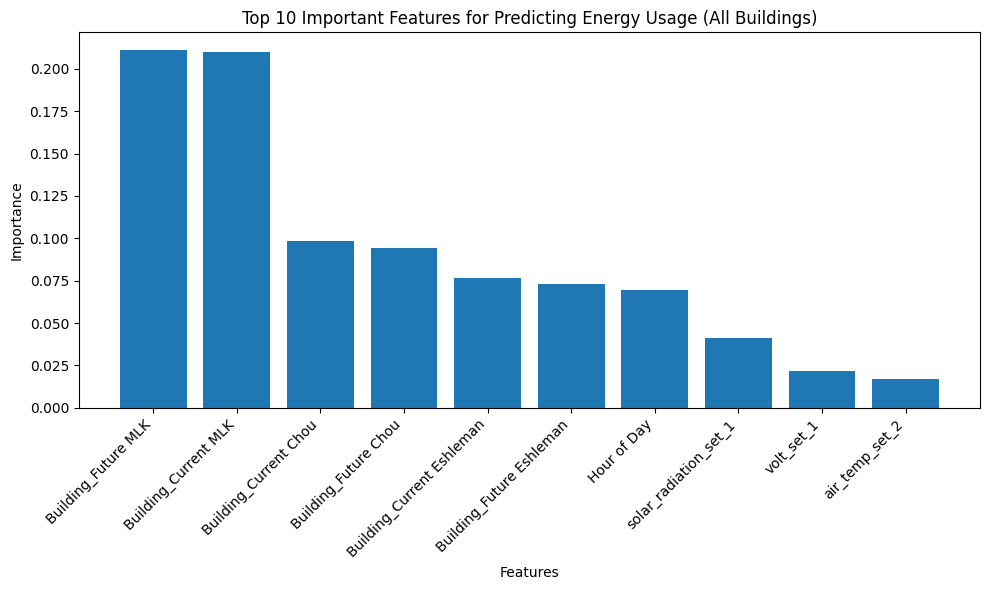

In [60]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train_melted.columns

# Combine feature names and their importance values
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Important Features for Predicting Energy Usage (All Buildings)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Random Forest model highlights solar radiation as the most influential predictor, followed by building-specific features (RSF, Eshleman) and other weather factors. This analysis helps us understand which features most impact energy usage and enabled more targeted modeling and interpretation.

## Bonus: Time Series Forecasting
Creating models for Times Series Forecasting utilizing the [Chronos-Bolt model](https://arxiv.org/abs/2403.07815) for zero-shot forecasting.

In [61]:
# Importing the AutoGluon library for Time Series Forecasting
!pip install autogluon
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [62]:
# Creating a generic evaluation function for Time Series Forecasting
def eval_ts(target, ts_train_df, ts_test_df):
    # Creating a Time Series Predictor to predict for the next 24 hours, with a frequency of per hour
    ts_predictor = TimeSeriesPredictor(target=target, prediction_length=24, freq="H").fit(
        ts_train_df,
        hyperparameters={
            "Chronos": {"model_path": "autogluon/chronos-bolt-small"},
        },
    )

    train_evals = predictor.evaluate(data=ts_train_df, metrics=['MSE', 'MAE'])
    test_evals = predictor.evaluate(data=ts_test_df, metrics=['MSE', 'MAE'])

    print("Train Evaluations:", train_evals)
    print("Test Evaluations:", test_evals)

    return ts_predictor

### Time Series Forecasting for Solar PV Generation

#### Train/Test Split
For Time Series Forecasting, the train/test split must be performed temporally, as opposed to random splitting. To achieve a roughly 80/20 train/test split, the test set will be the last 5 months of the dataset.

In [63]:
# The solar PV generation dataset contains data from Nov. 2022 to Nov. 2024
# With 24 total months of data, the test set will be the last 5 months to acheive a roughly 80/20 train/test split
# Thus, the split should occuring on June 2024
train_df = solar_melted_df[solar_melted_df['Current Timestamp'] < '2024-06-01']
test_df = solar_melted_df[solar_melted_df['Current Timestamp'] >= '2024-06-01']

In [64]:
# Casting the dataframes to TimeSeriesDataFrames 
ts_train_df = TimeSeriesDataFrame(data=train_df, id_column='Building', timestamp_column='Current Timestamp')
ts_test_df = TimeSeriesDataFrame(data=test_df, id_column='Building', timestamp_column='Current Timestamp')

#### Model Evalutation

In [65]:
print("Time Series Forecasting for Solar PV Generation:")
ts_predictor = eval_ts('PV Generation', ts_train_df, ts_test_df)

# For the Time Series Forecasting model, the model was evaluated on a separate machine due to computuational limitations.
# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.
# The results of the model are displayed below for your convenience:

```
Time Series Forecasting for Solar PV Generation:
{'MSE': 50.702139901121406,
 'MAE': 3.550470844649438}
```

We decided not to use $R^2$ as a performance metric because it is less informative in a time series context, where the model's goal is to capture patterns over time rather than simply fitting observed values. $R^2$ can also be misleading for time series models when data shows strong seasonality or trends, since these factors might inflate or distort the interpretation of the score.

The model provides reasonably accurate predictions, capturing trends in Solar PV Generation with minimal error. This suggests that the model effectively handles the temporal patterns in the data.

### Time Series Forecasting for Energy Usage

Next, we used the time series forecasting model to predict energy usage.

#### Train/Test Split

In [66]:
# The solar PV generation dataset contains data from July 2020 to July 2022
# With 24 total months of data, the test set will be the last 5 months to acheive a roughly 80/20 train/test split
# Thus, the split should occuring on Feb. 2022
test_df = usage_melted_df[usage_melted_df['Current Timestamp'] < '2022-02-01']
train_df = usage_melted_df[usage_melted_df['Current Timestamp'] >= '2022-02-01']

In [67]:
# Casting the dataframes to TimeSeriesDataFrames
ts_train_df = TimeSeriesDataFrame(data=train_df, id_column='Building', timestamp_column='Current Timestamp')
ts_test_df = TimeSeriesDataFrame(data=test_df, id_column='Building', timestamp_column='Current Timestamp')

#### Model Evalutation

In [68]:
print("Time Series Forecasting for Energy Usage:")
ts_predictor = eval_ts('Energy Usage (kWh)', ts_train_df, ts_test_df)

# For the Time Series Forecasting model, the model was evaluated on a separate machine due to computuational limitations.
# NOTE: This cell is perfectly functionally, and WILL successfully execute. However, it is computationally expensive, and may take a long time to run.
# The results of the model are displayed below for your convenience:

```
Time Series Forecasting for Energy Usage:
{'MSE': 2165.6750007121486,
 'MAE': 26.65740701835144}
```

#### Why do the Random Forest and Time Series Forecasting models perform better than other models?

From our data exploration, we observed that the target variables exhibit a cyclical pattern over time. Traditional "equation-based" models, such as Lasso and Linear Regression, struggle to capture this cyclical nature effectively due to their reliance on linear relationships and assumptions.

In contrast, Random Forest is not constrained by linear assumptions. Its ability to make flexible, non-linear splits enables it to better adapt to complex patterns, including cyclicality, within the data. Similarly, Time Series Forecasting methods are specifically designed to identify and model seasonality and trends, making them inherently better suited for capturing the cyclical patterns observed in our data.

## Interpretation and Conclusions

Our analysis identifies the optimal time to charge solar batteries for use during peak electricity demand, addressing the following research question: *When in the day is it best to charge a solar battery so that it could be used during peak hours when electricity prices are higher and solar production might be lower?* Using our predictive models, stakeholders can optimize energy usage and solar PV generation for UC Berkeley campus buildings. During peak price hours ([see PG&E Peak Day Forecast here](https://www.pge.com/en/account/rate-plans/find-your-best-rate-plan/peak-day-pricing.html?WT.mc_id=Vanity_pdp#PDPforecast)), which typically range from \$0.15 to \$0.20 per kWh, predictions for energy usage allow decision-makers to anticipate upcoming demand and prepare for cost-saving strategies. By pre-charging batteries during off-peak hours, when prices are lower at \$0.07 to \$0.10 per kWh, buildings can significantly reduce reliance on expensive grid electricity during high-demand periods. Midday is identified as the most efficient time for battery charging due to peak solar radiation levels, making this an essential window for making use of solar PV generation. Implementing this strategy across major campus buildings could lead to substantial cost savings, potentially amounting to hundreds of thousands of dollars annually, depending on energy demand patterns and battery efficiency.

This analysis is particularly significant in the broader context of UC Berkeley's ambitious goal to achieve carbon neutrality by 2025. Energy usage, particularly during peak demand periods, contributes to financial costs and environmental stress on the power grid. By using our model and following our recommendations, the university can reduce peak electricity demand, minimize carbon emissions, and decrease dependency on fossil fuel-intensive power sources. As grid infrastructure often struggles to meet peak demand, our approach not only eases strain on energy systems but also advances energy independence through increased solar power generation. These outcomes support UC Berkeley's goals of both economic efficiency and environmental sustainability.

Despite the promising results of our models, there are several limitations that must be acknowledged to provide a comprehensive understanding of the findings. Solar production is inherently dependent on weather conditions, which introduces variability into the predictions. Overcast or rainy days, particularly during transitional seasons like spring and fall, can significantly reduce midday solar generation and disrupt charging schedules. This unpredictability highlights the importance of integrating real-time weather forecasts into future models. Additionally, our predictive framework assumes stable electricity pricing and consistent battery efficiency over time. However, market conditions, technological advancements, and changes in energy policies can introduce fluctuations that may affect the accuracy of cost savings projections. And while Random Forest models performed well in our analysis, they may overestimate the benefits of midday charging if solar generation is lower than expected due to environmental factors such as panel shading, dirt accumulation, or maintenance issues.

To address these limitations, future work could incorporate additional variables and techniques to improve the robustness of the predictions. For instance, integrating real-time weather forecasting could allow dynamic adjustments to battery charging schedules, which would improve accuracy and adaptability. Long-term energy strategies could also benefit from battery degradation modeling, which accounts for performance declines over time and ensures more reliable projections. Expanding the framework to include additional renewable energy sources, such as wind or geothermal power, could also increase the effectiveness by having more diverse renewable energy sources. These improvements would strengthen the predictive power of the models and ensure long-term sustainability for energy resource management.

Overall, our analysis provides a clear and actionable path for optimizing energy resource allocation at UC Berkeley. By using our predictive models for both solar PV generation and energy usage, the campus can strategically manage battery charging, reduce energy costs, and advance its carbon neutrality efforts. Our framework offers a scalable and adaptable solution for smarter energy management, which balances both economic benefits with environmental responsibility. With a bit more refinement, this approach has the potential to serve as a model for other institutions who are seeking to transition toward cleaner and more efficient energy systems.
